In [1]:
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('./owid-covid-data.csv')

In [3]:
print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
166321      ZWE    Africa     Zimbabwe  2022-03-01     236871.0      491.0   
166322      ZWE    Africa     Zimbabwe  2022-03-02     237503.0      632.0   
166323      ZWE    Africa     Zimbabwe  2022-03-03     237503.0        0.0   
166324      ZWE    Africa     Zimbabwe  2022-03-04     238739.0     1236.0   
166325      ZWE    Africa     Zimbabwe  2022-03-05     239019.0      280.0   

        new_cases_smoothed  total_deaths  new_deaths  new_death

In [4]:
df = df.iloc[:,0:9]
print(df)

       iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-02-24          5.0        5.0   
1           AFG      Asia  Afghanistan  2020-02-25          5.0        0.0   
2           AFG      Asia  Afghanistan  2020-02-26          5.0        0.0   
3           AFG      Asia  Afghanistan  2020-02-27          5.0        0.0   
4           AFG      Asia  Afghanistan  2020-02-28          5.0        0.0   
...         ...       ...          ...         ...          ...        ...   
166321      ZWE    Africa     Zimbabwe  2022-03-01     236871.0      491.0   
166322      ZWE    Africa     Zimbabwe  2022-03-02     237503.0      632.0   
166323      ZWE    Africa     Zimbabwe  2022-03-03     237503.0        0.0   
166324      ZWE    Africa     Zimbabwe  2022-03-04     238739.0     1236.0   
166325      ZWE    Africa     Zimbabwe  2022-03-05     239019.0      280.0   

        new_cases_smoothed  total_deaths  new_deaths  
0       

In [5]:
df.drop(['new_cases_smoothed','iso_code','continent','total_cases','total_deaths'],axis=1,inplace=True)
print(df.head())

      location        date  new_cases  new_deaths
0  Afghanistan  2020-02-24        5.0         NaN
1  Afghanistan  2020-02-25        0.0         NaN
2  Afghanistan  2020-02-26        0.0         NaN
3  Afghanistan  2020-02-27        0.0         NaN
4  Afghanistan  2020-02-28        0.0         NaN


In [6]:
df.rename(columns={'location':'Country', 'date':'Date', 'new_cases':'New Cases','new_deaths':'New Deaths'},inplace=True)
print(df.head())

       Country        Date  New Cases  New Deaths
0  Afghanistan  2020-02-24        5.0         NaN
1  Afghanistan  2020-02-25        0.0         NaN
2  Afghanistan  2020-02-26        0.0         NaN
3  Afghanistan  2020-02-27        0.0         NaN
4  Afghanistan  2020-02-28        0.0         NaN


In [7]:
df['Date'] = pd.to_datetime(df['Date'])
print(df.head())

       Country       Date  New Cases  New Deaths
0  Afghanistan 2020-02-24        5.0         NaN
1  Afghanistan 2020-02-25        0.0         NaN
2  Afghanistan 2020-02-26        0.0         NaN
3  Afghanistan 2020-02-27        0.0         NaN
4  Afghanistan 2020-02-28        0.0         NaN


In [8]:
print(df.describe())

          New Cases     New Deaths
count  1.631330e+05  145487.000000
mean   1.157084e+04     171.137304
std    8.442598e+04     832.251328
min    0.000000e+00       0.000000
25%    1.000000e+00       0.000000
50%    7.900000e+01       2.000000
75%    1.063000e+03      20.000000
max    4.206334e+06   18020.000000


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Country     166326 non-null  object        
 1   Date        166326 non-null  datetime64[ns]
 2   New Cases   163133 non-null  float64       
 3   New Deaths  145487 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 5.1+ MB
None


In [10]:
df = df.fillna(0) # Removing the null values
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166326 entries, 0 to 166325
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Country     166326 non-null  object        
 1   Date        166326 non-null  datetime64[ns]
 2   New Cases   166326 non-null  float64       
 3   New Deaths  166326 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 5.1+ MB
None


In [11]:
df2 = df.groupby('Country')[['Country','New Cases','New Deaths']].sum().reset_index()
print(df2)

               Country    New Cases  New Deaths
0          Afghanistan     174339.0      7622.0
1               Africa   11254551.0    248969.0
2              Albania     272030.0      3478.0
3              Algeria     265227.0      6853.0
4              Andorra      38434.0       151.0
..                 ...          ...         ...
233  Wallis and Futuna        454.0         7.0
234              World  443975063.0   5969463.0
235              Yemen      11776.0      2135.0
236             Zambia     313744.0      3958.0
237           Zimbabwe     239025.0      5397.0

[238 rows x 3 columns]


In [12]:
df2 = df.groupby(['Country','Date'])[['Country','Date','New Cases','New Deaths']].sum().reset_index()
print(df2)

            Country       Date  New Cases  New Deaths
0       Afghanistan 2020-02-24        5.0         0.0
1       Afghanistan 2020-02-25        0.0         0.0
2       Afghanistan 2020-02-26        0.0         0.0
3       Afghanistan 2020-02-27        0.0         0.0
4       Afghanistan 2020-02-28        0.0         0.0
...             ...        ...        ...         ...
166321     Zimbabwe 2022-03-01      491.0         0.0
166322     Zimbabwe 2022-03-02      632.0         1.0
166323     Zimbabwe 2022-03-03        0.0         0.0
166324     Zimbabwe 2022-03-04     1236.0         1.0
166325     Zimbabwe 2022-03-05      280.0         0.0

[166326 rows x 4 columns]


In [13]:
df3 = df2[df2['New Cases']>100]
print(df3)

            Country       Date  New Cases  New Deaths
51      Afghanistan 2020-04-15      105.0         3.0
61      Afghanistan 2020-04-25      104.0         3.0
62      Afghanistan 2020-04-26      133.0         6.0
64      Afghanistan 2020-04-28      172.0        10.0
65      Afghanistan 2020-04-29      124.0         0.0
...             ...        ...        ...         ...
166320     Zimbabwe 2022-02-28      577.0         2.0
166321     Zimbabwe 2022-03-01      491.0         0.0
166322     Zimbabwe 2022-03-02      632.0         1.0
166324     Zimbabwe 2022-03-04     1236.0         1.0
166325     Zimbabwe 2022-03-05      280.0         0.0

[78209 rows x 4 columns]


In [14]:
countries = df3['Country'].unique()
print(len(countries))

216


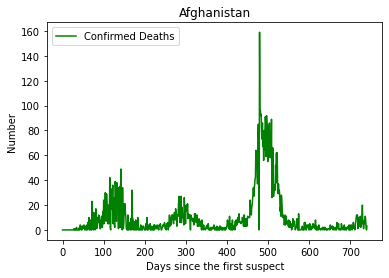

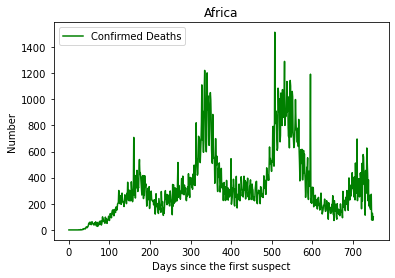

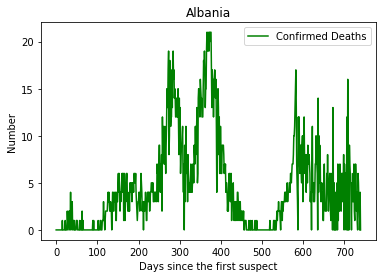

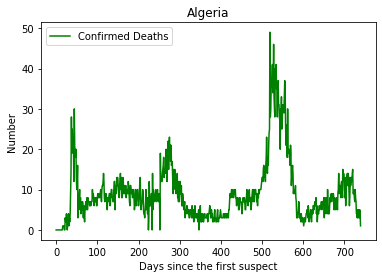

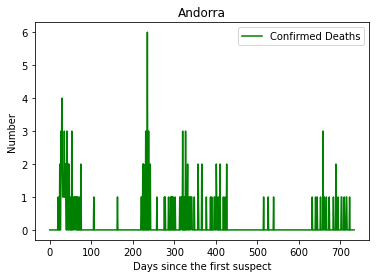

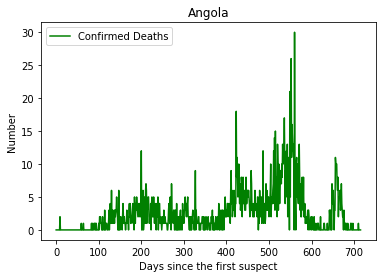

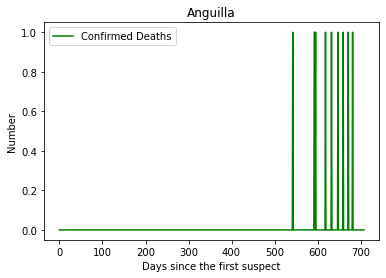

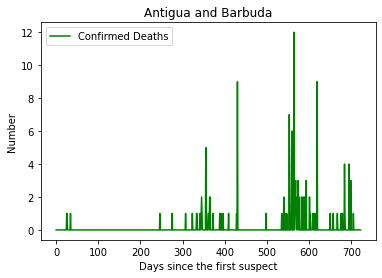

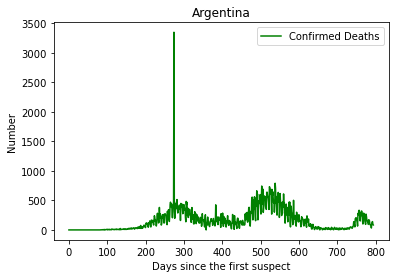

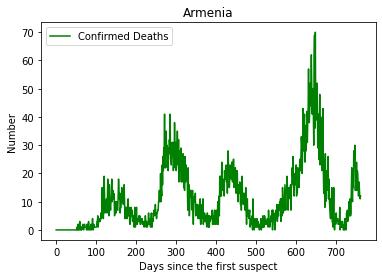

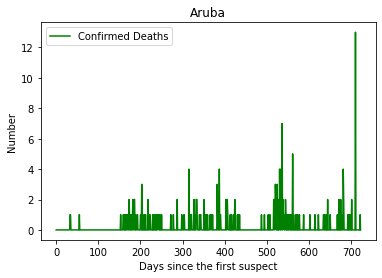

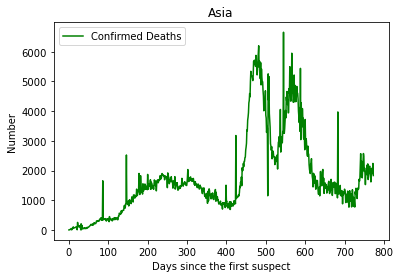

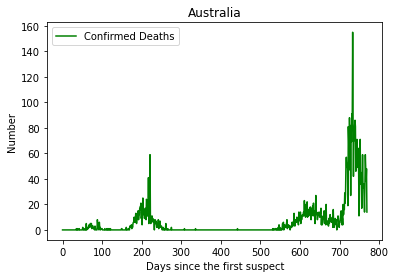

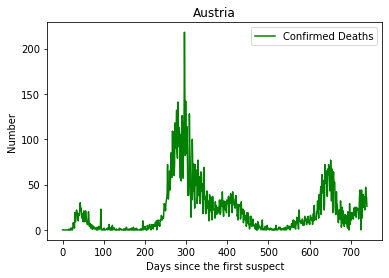

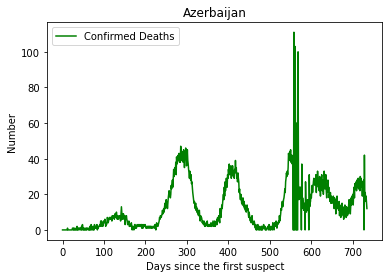

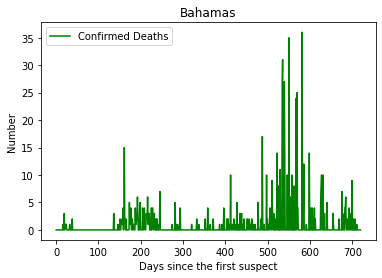

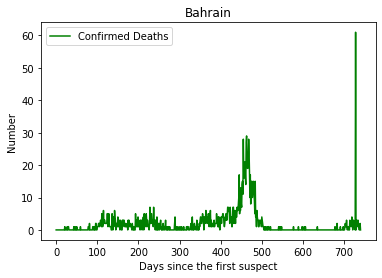

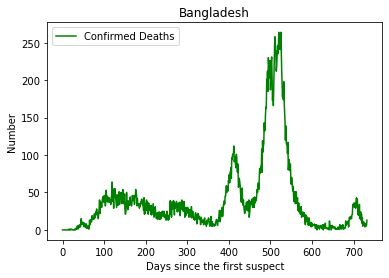

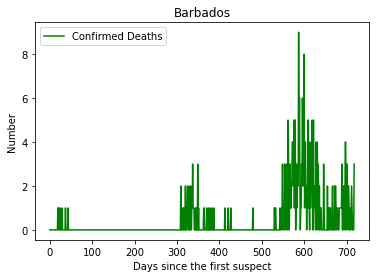

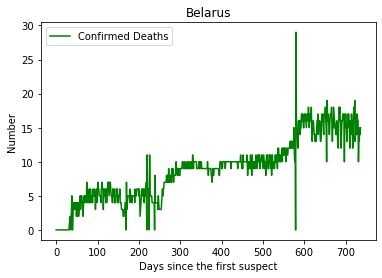

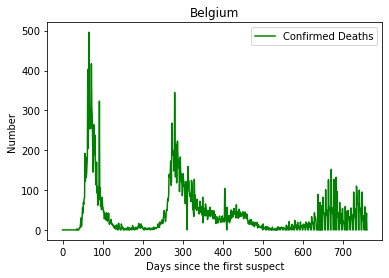

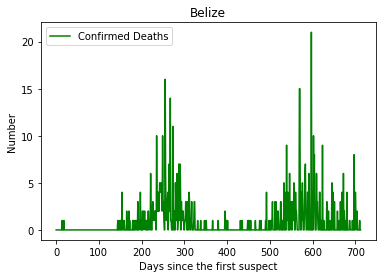

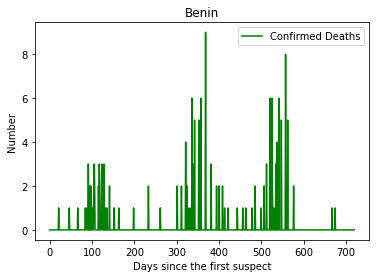

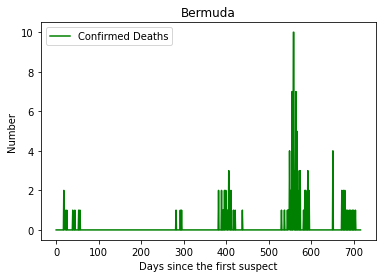

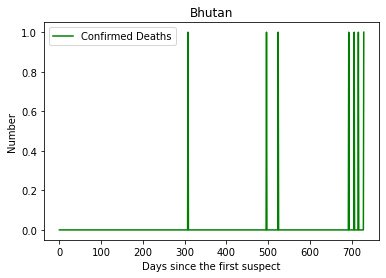

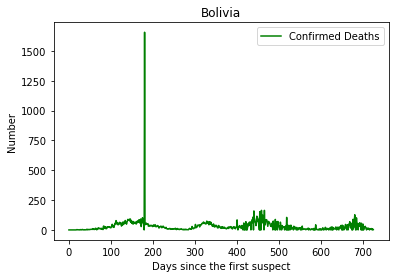

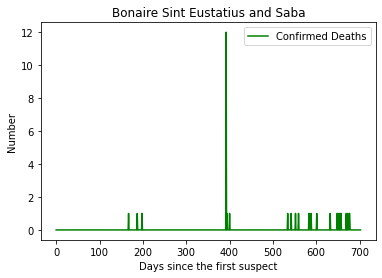

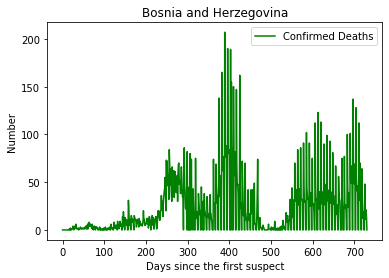

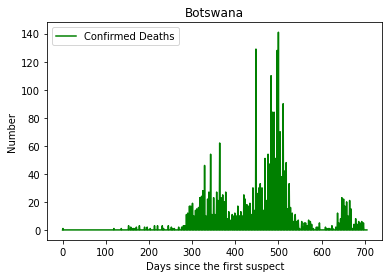

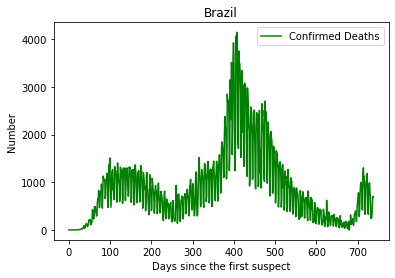

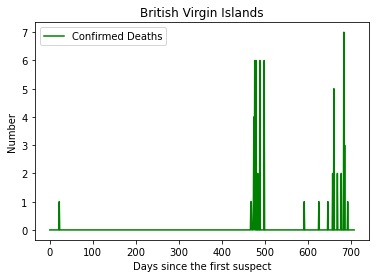

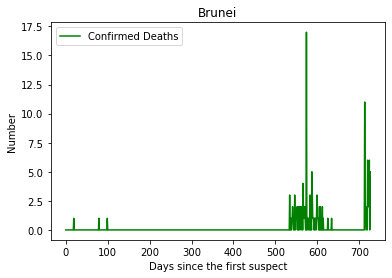

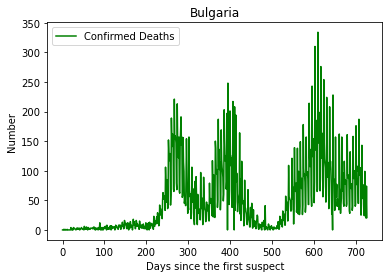

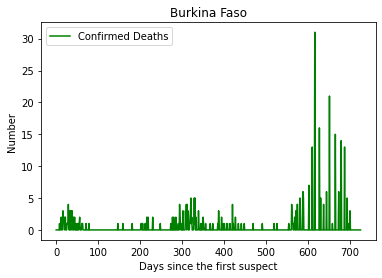

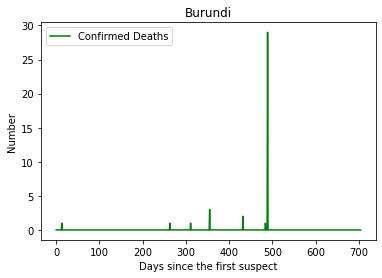

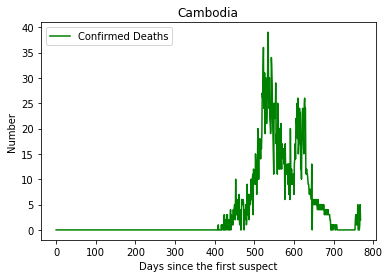

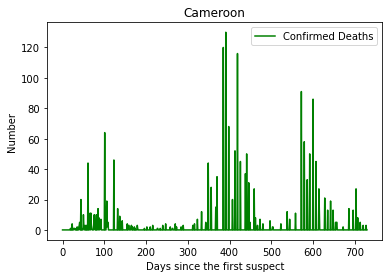

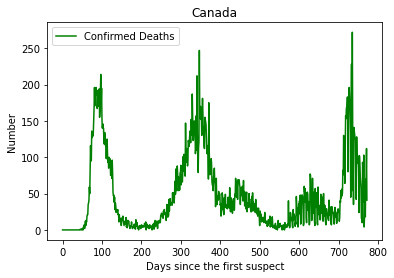

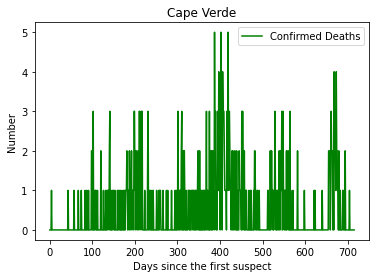

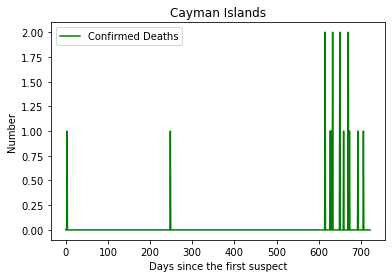

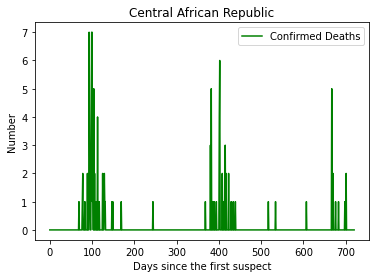

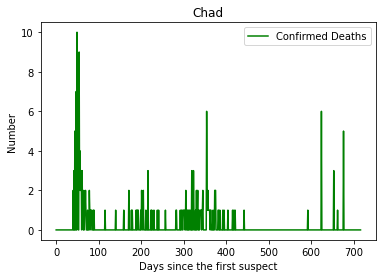

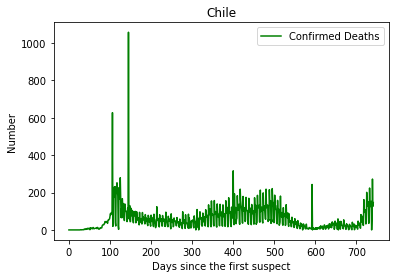

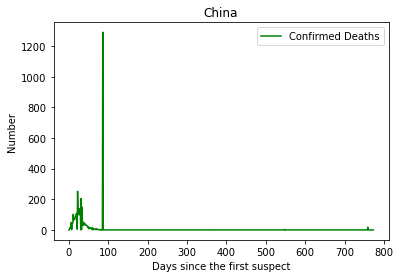

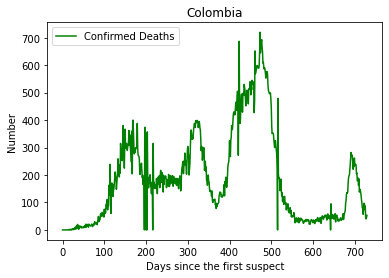

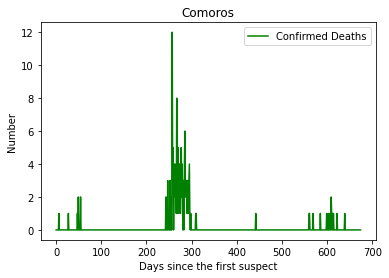

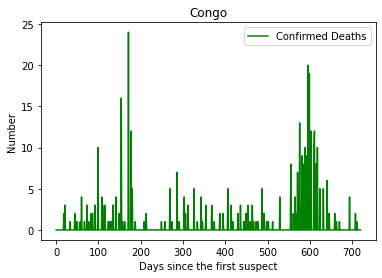

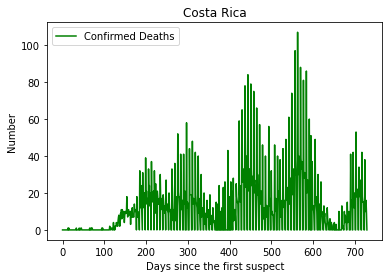

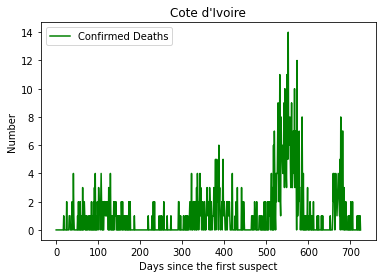

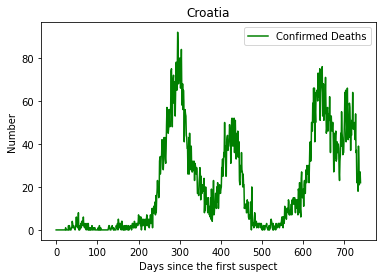

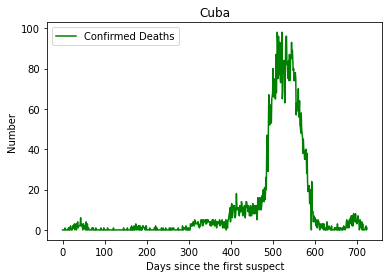

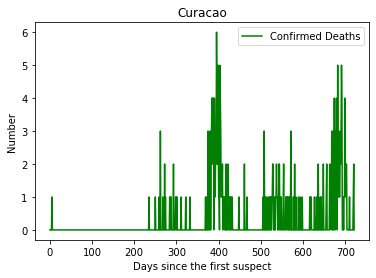

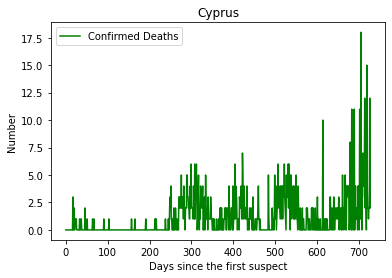

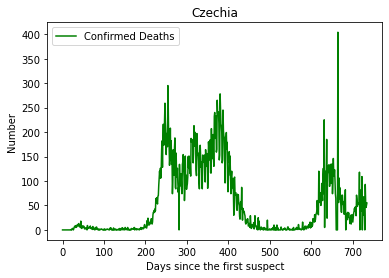

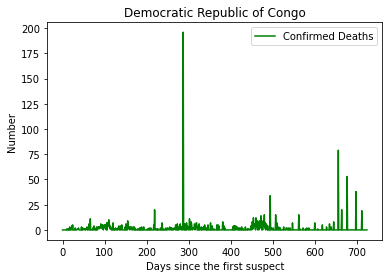

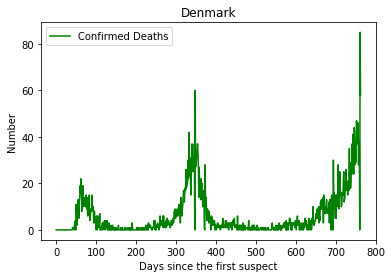

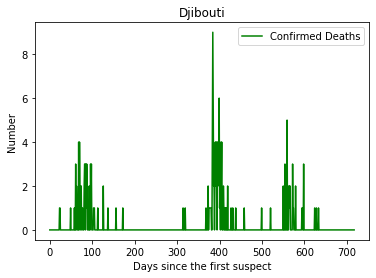

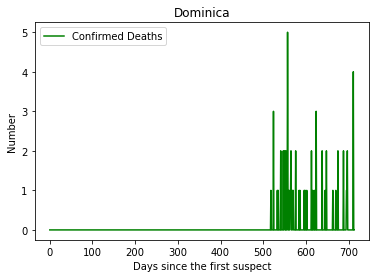

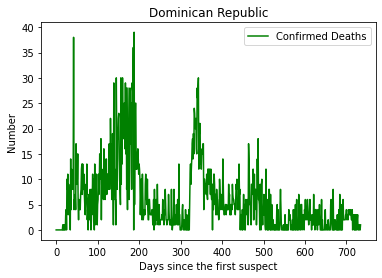

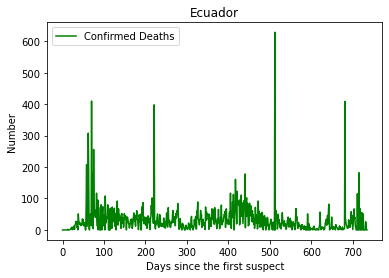

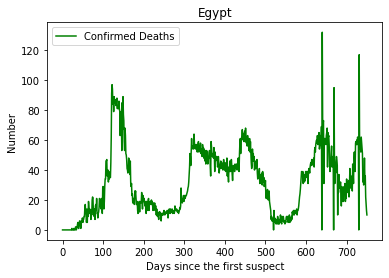

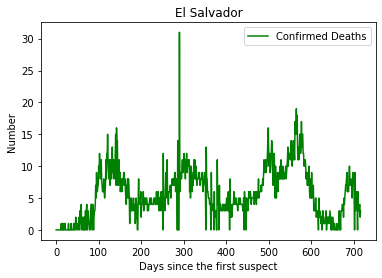

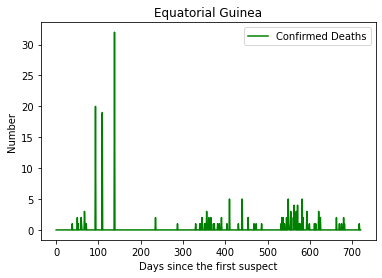

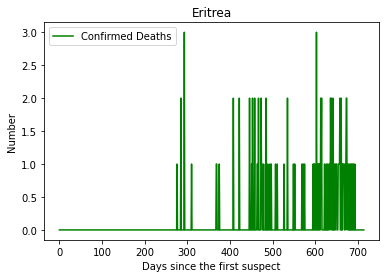

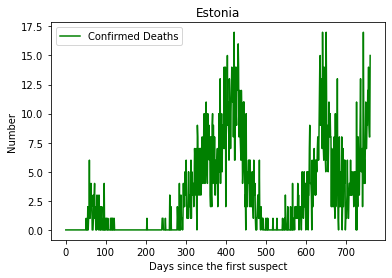

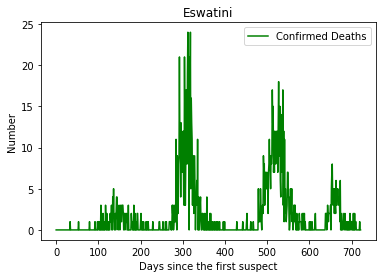

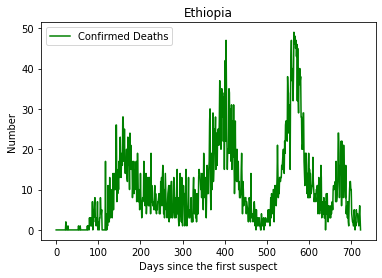

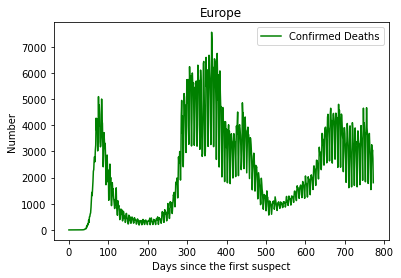

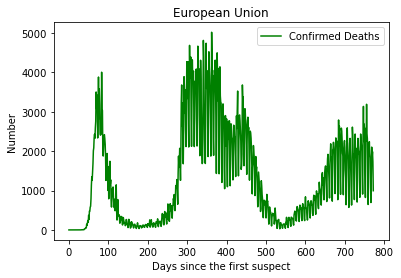

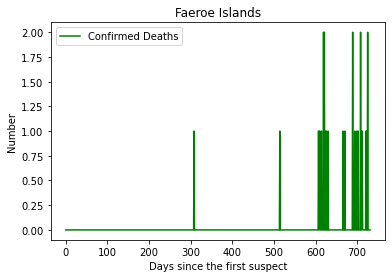

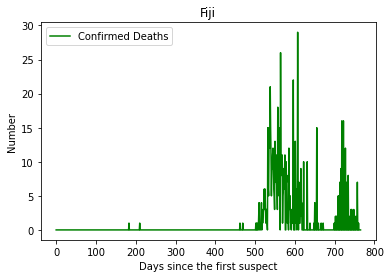

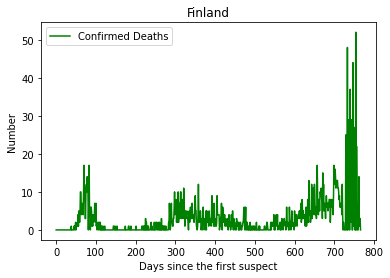

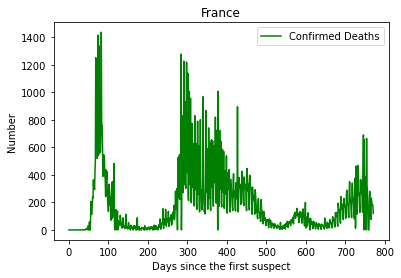

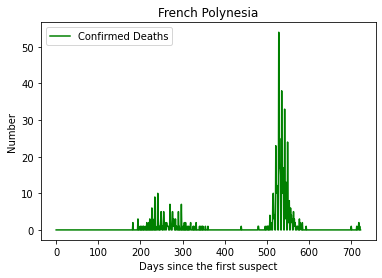

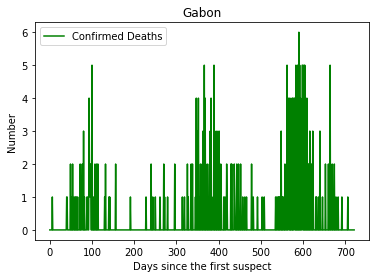

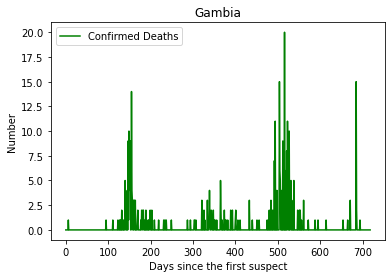

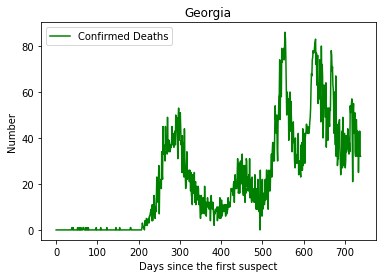

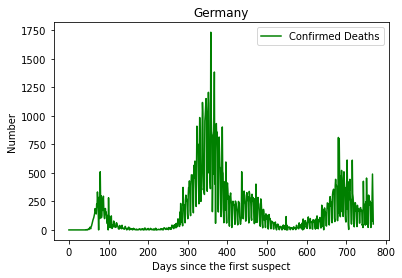

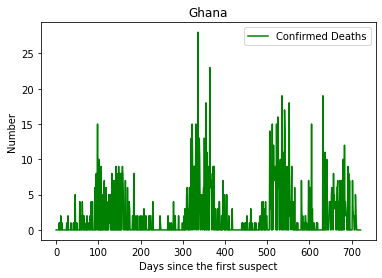

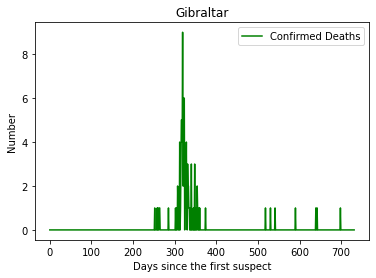

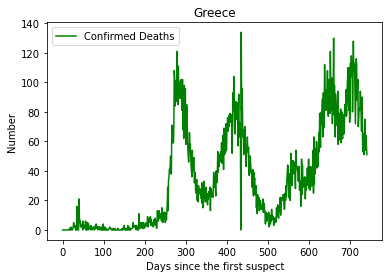

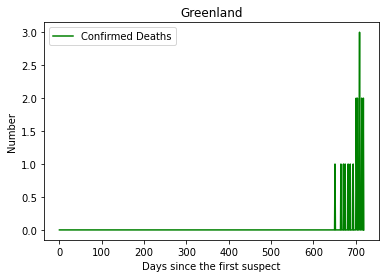

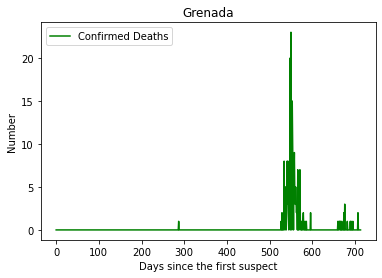

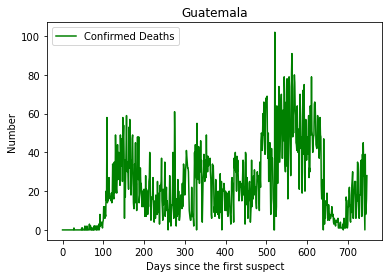

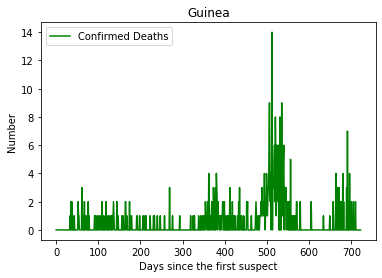

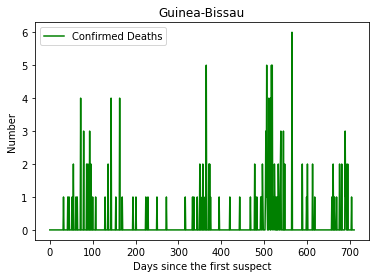

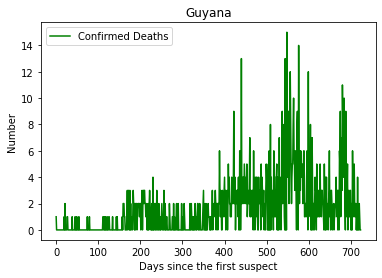

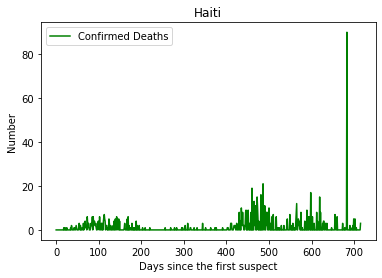

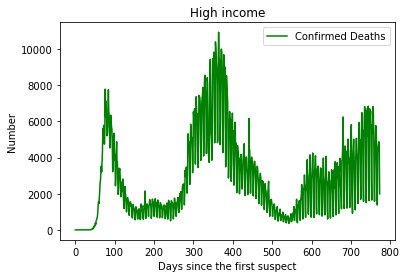

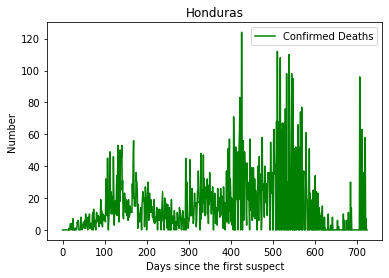

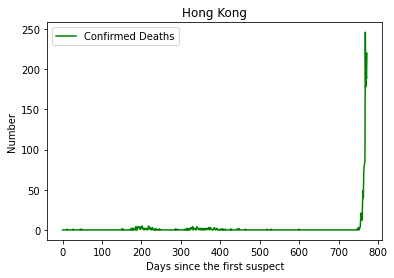

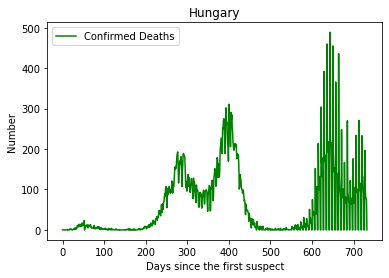

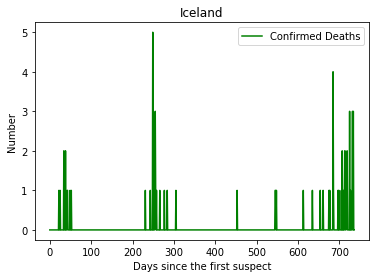

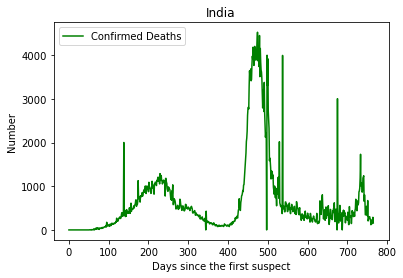

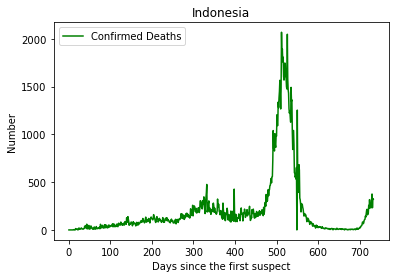

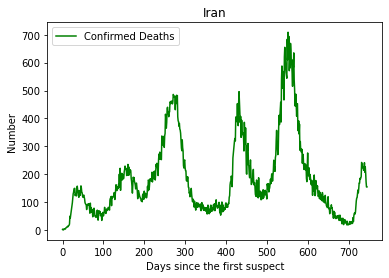

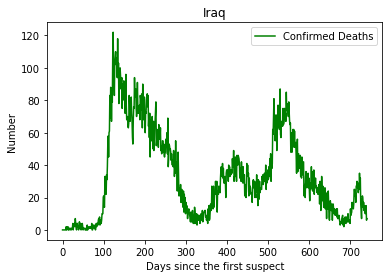

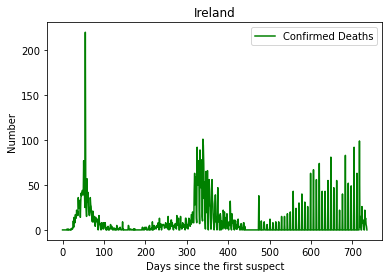

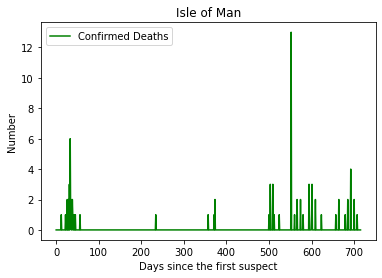

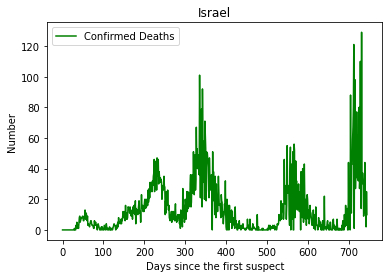

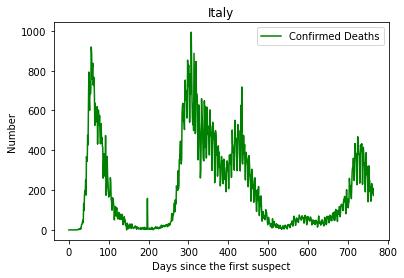

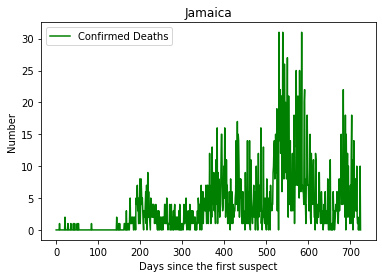

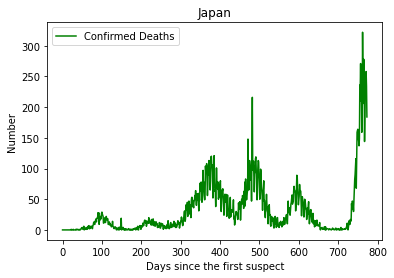

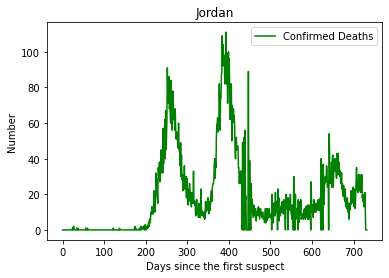

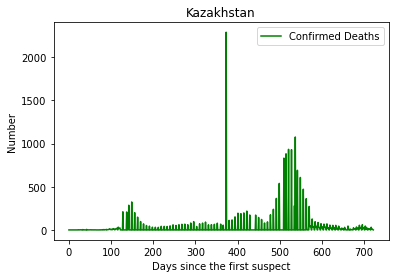

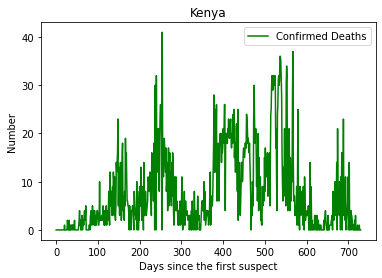

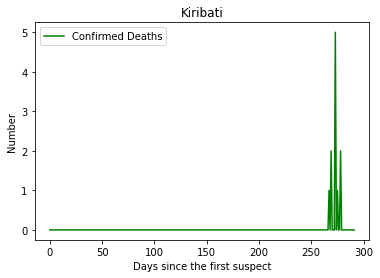

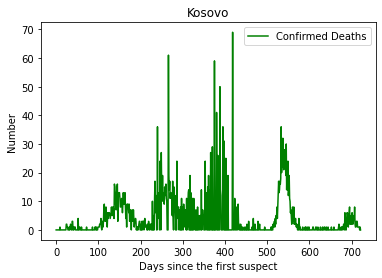

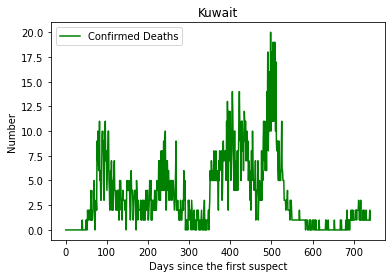

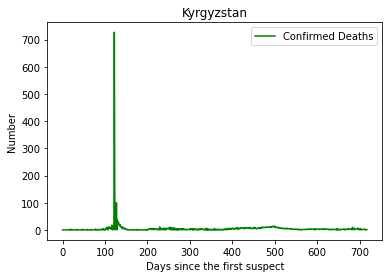

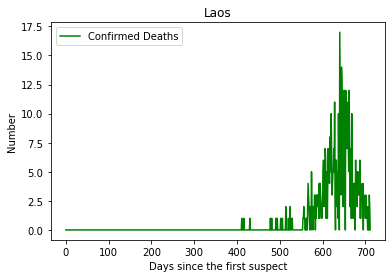

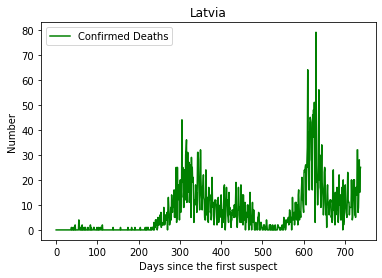

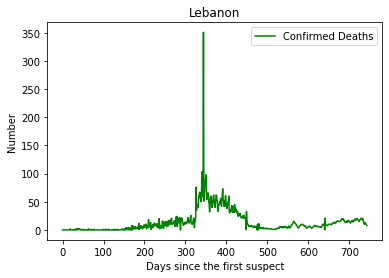

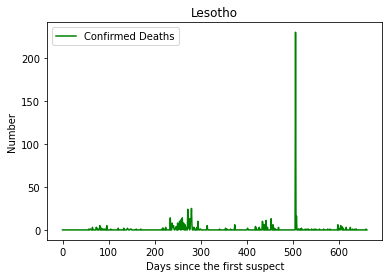

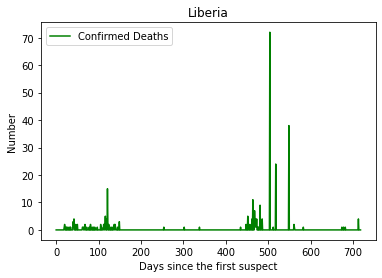

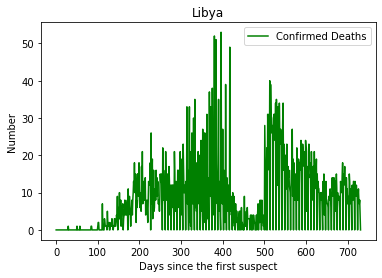

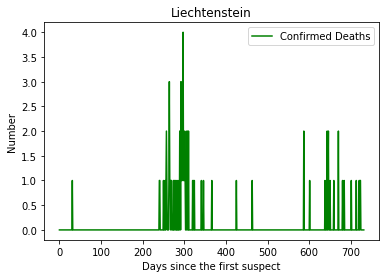

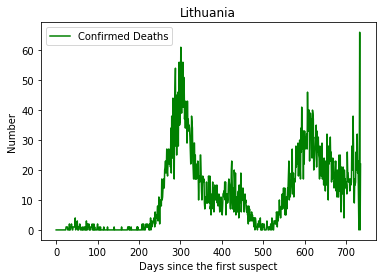

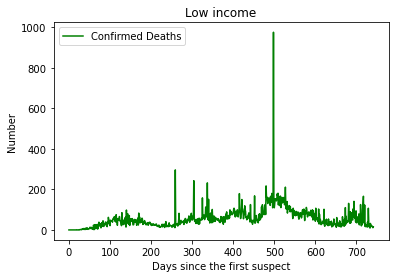

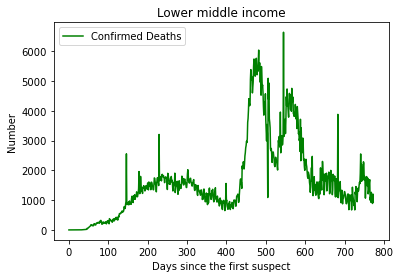

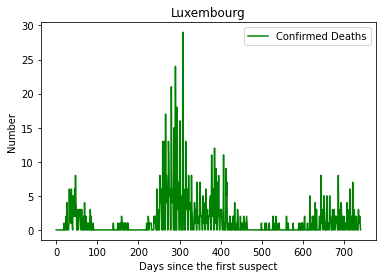

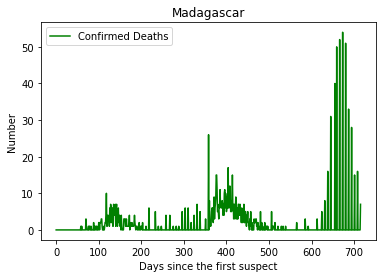

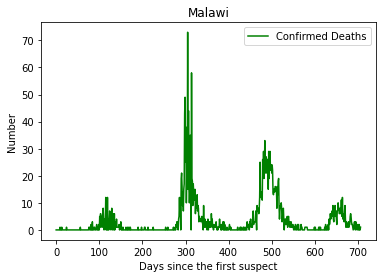

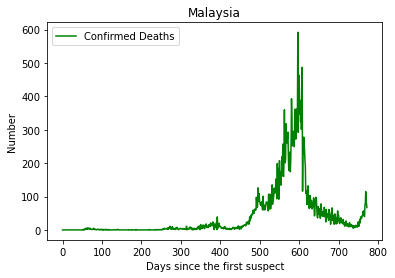

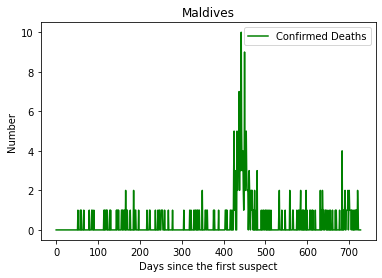

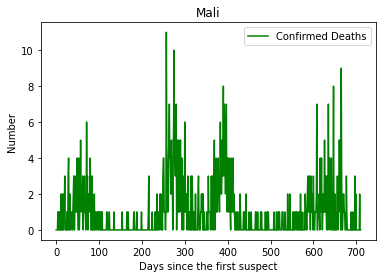

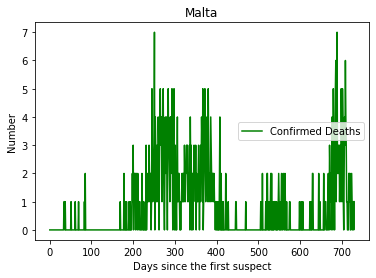

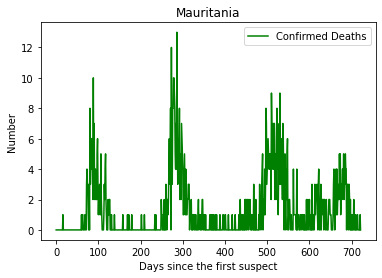

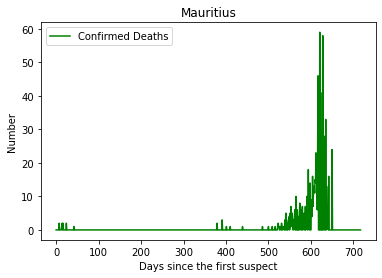

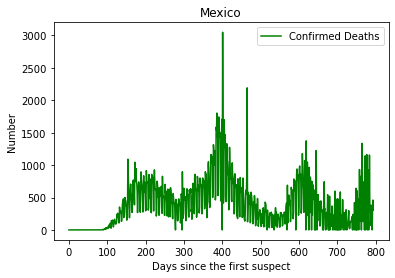

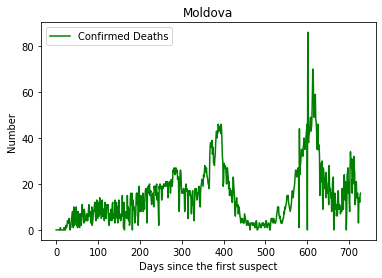

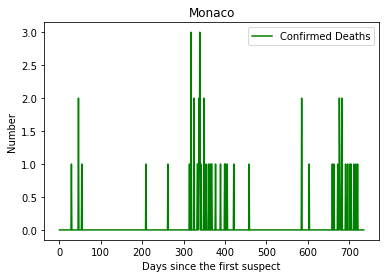

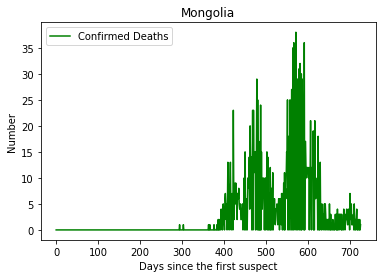

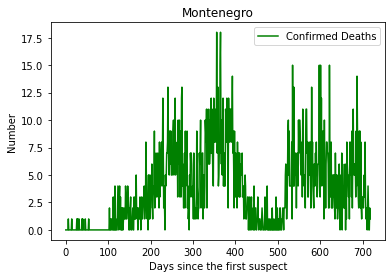

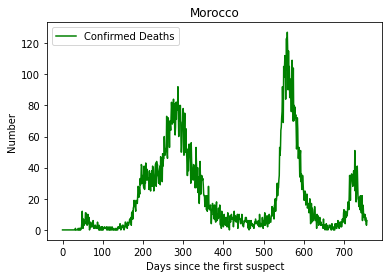

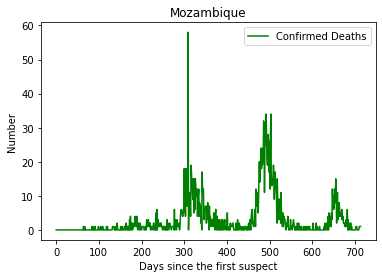

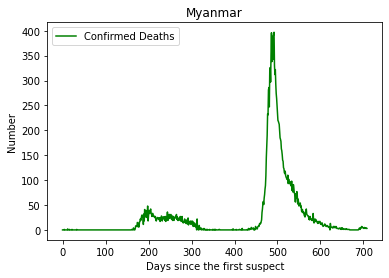

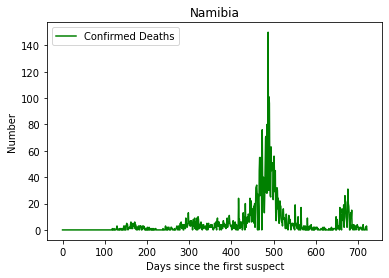

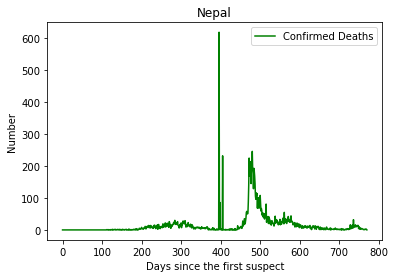

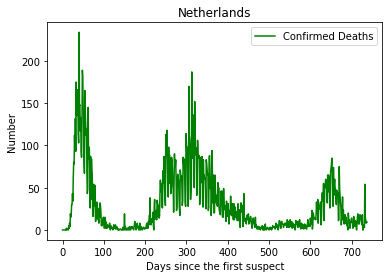

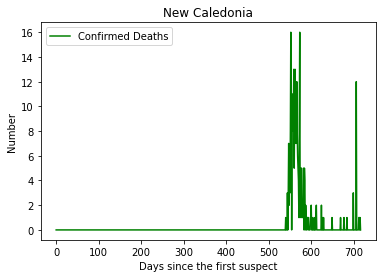

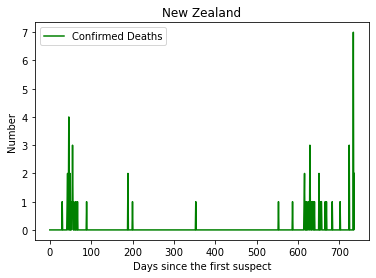

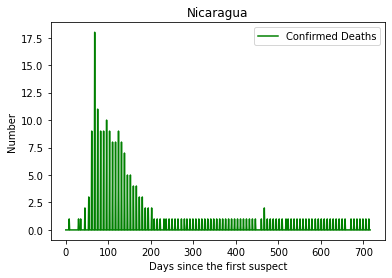

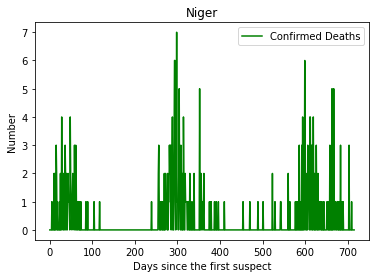

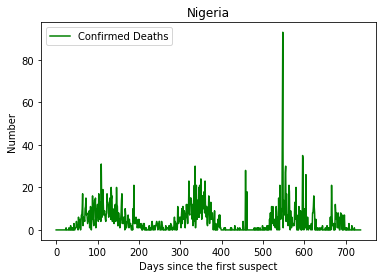

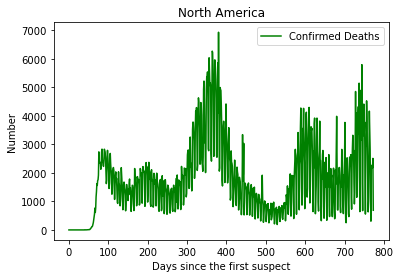

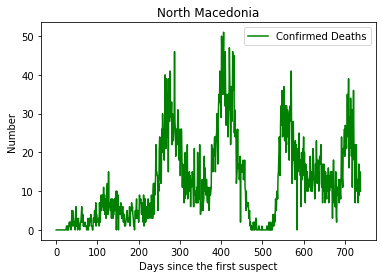

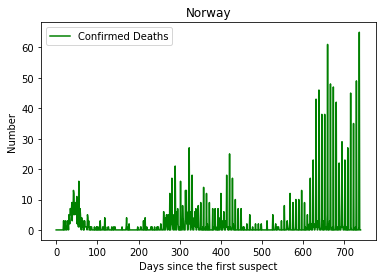

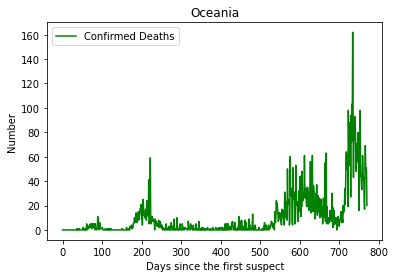

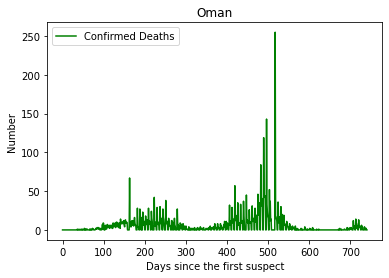

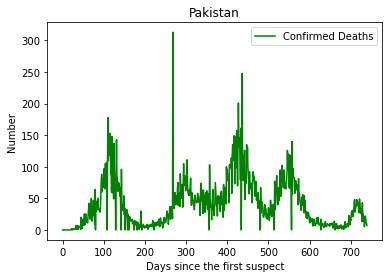

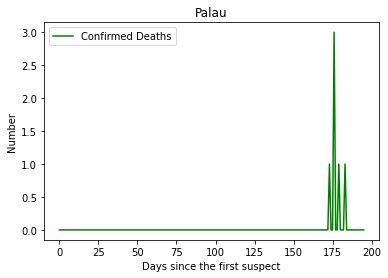

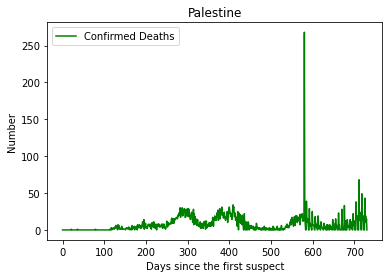

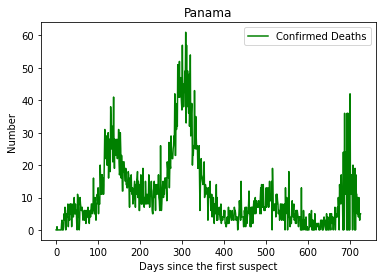

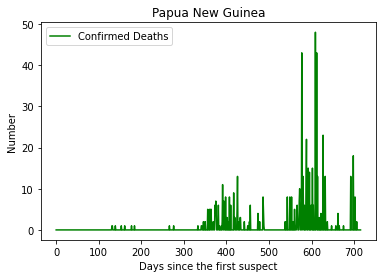

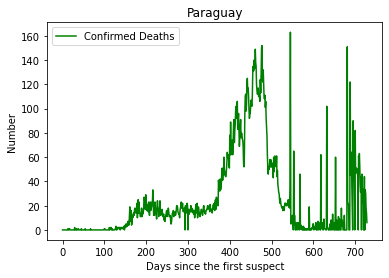

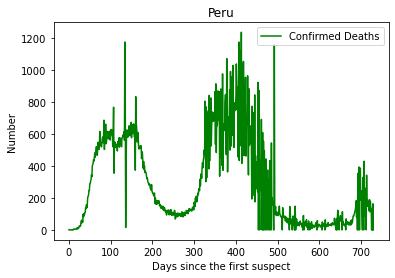

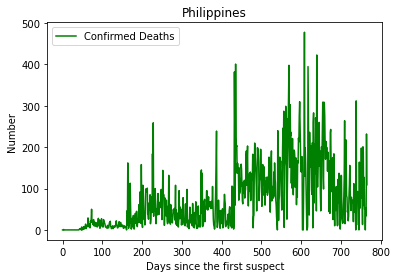

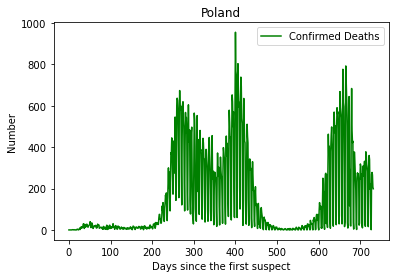

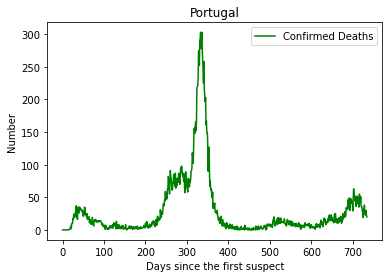

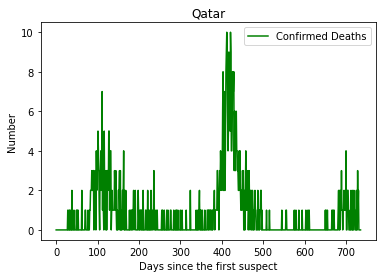

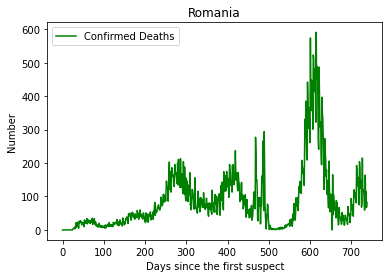

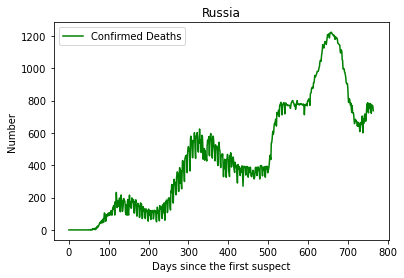

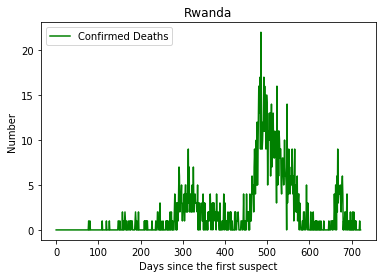

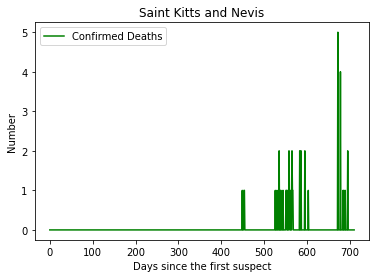

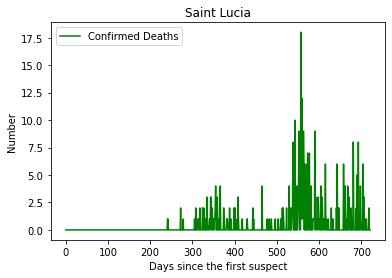

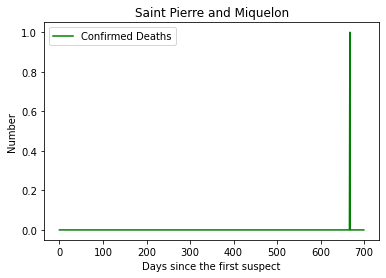

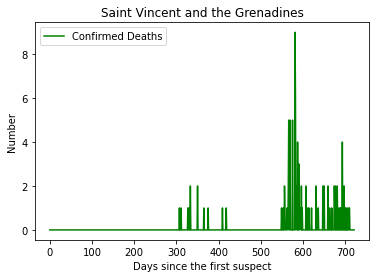

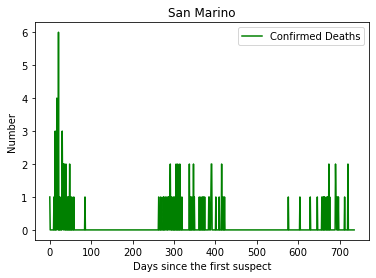

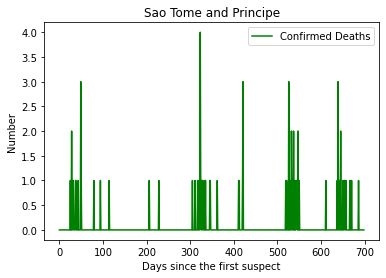

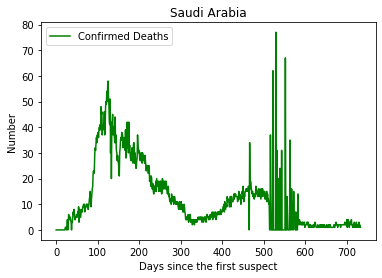

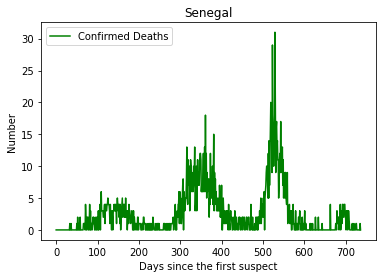

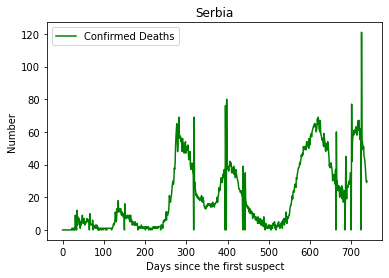

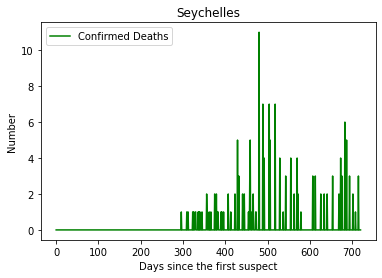

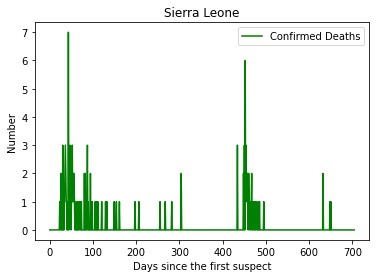

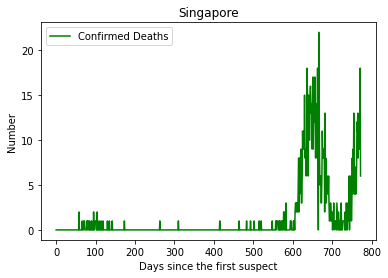

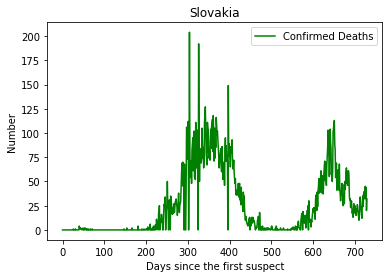

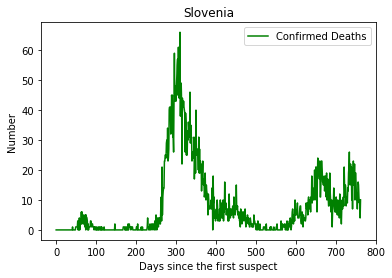

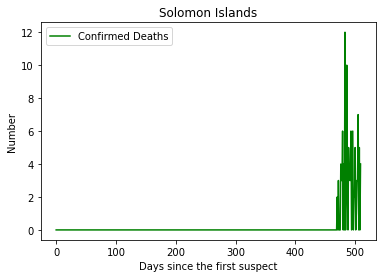

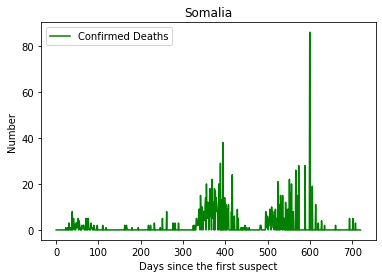

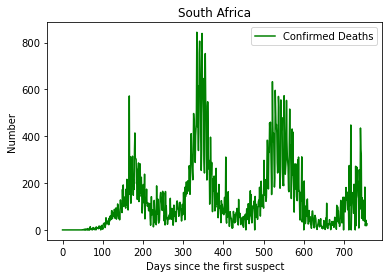

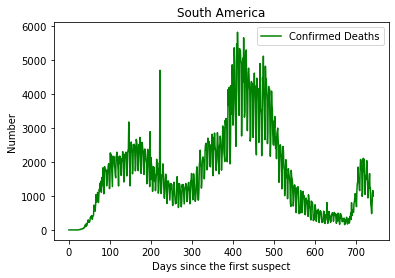

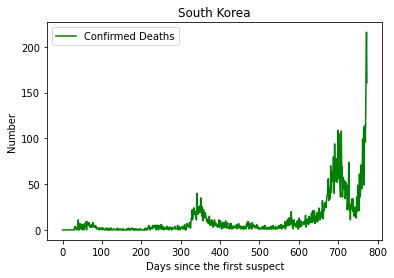

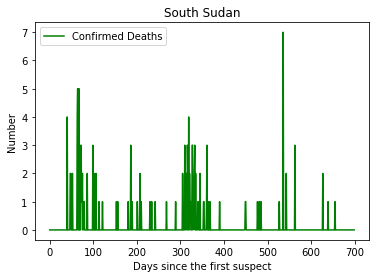

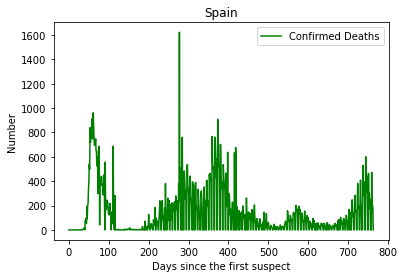

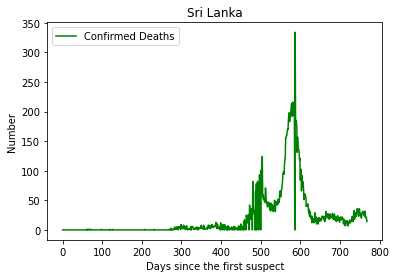

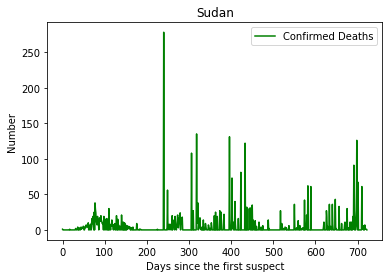

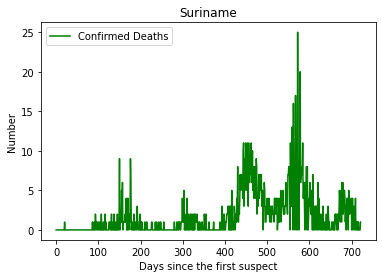

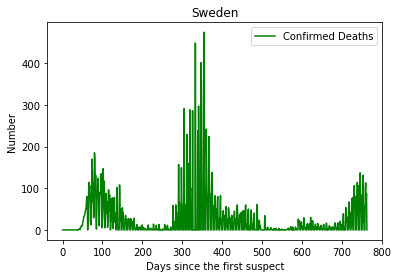

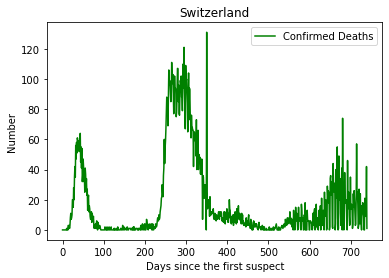

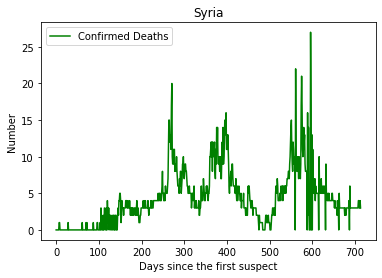

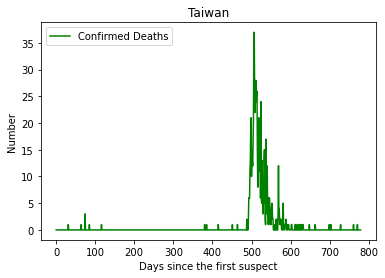

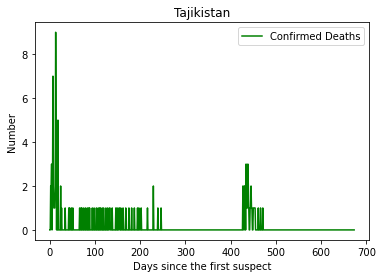

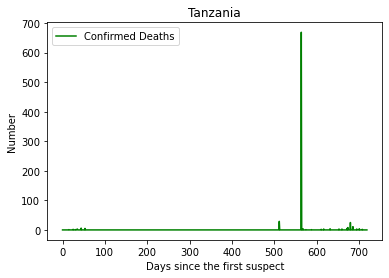

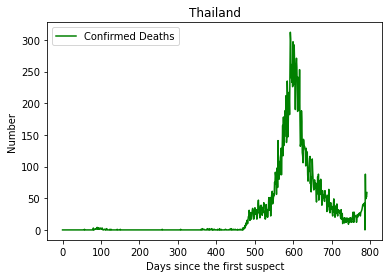

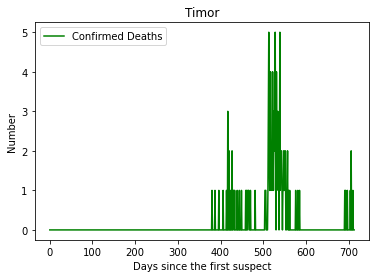

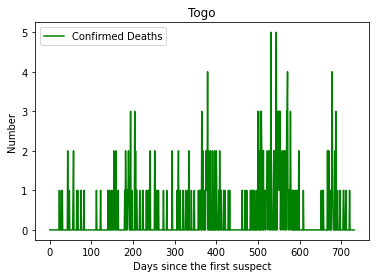

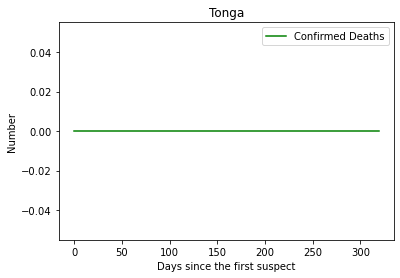

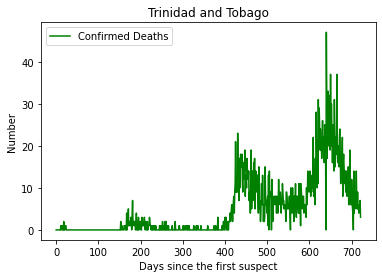

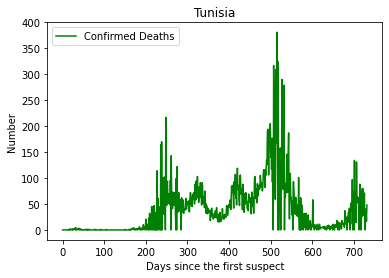

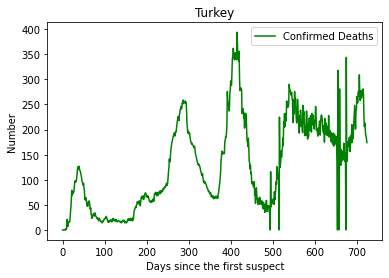

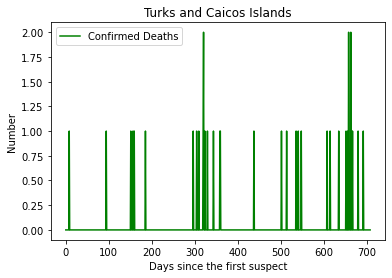

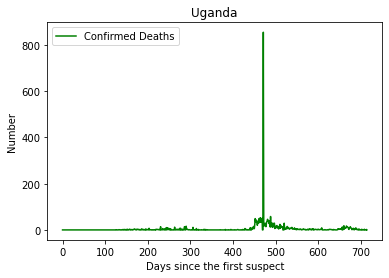

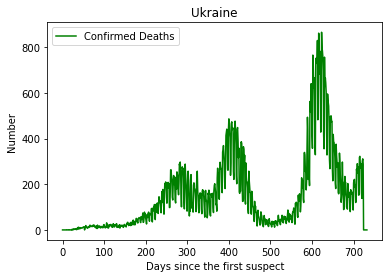

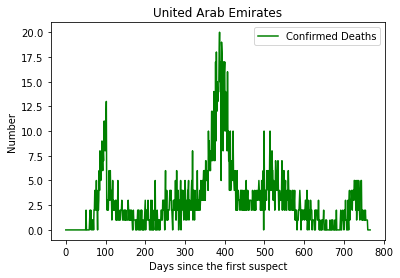

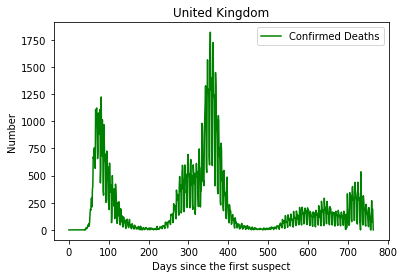

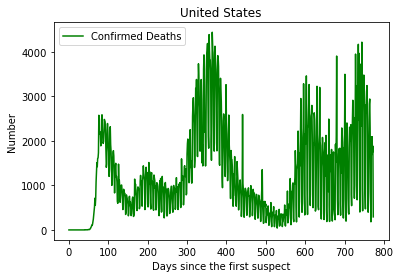

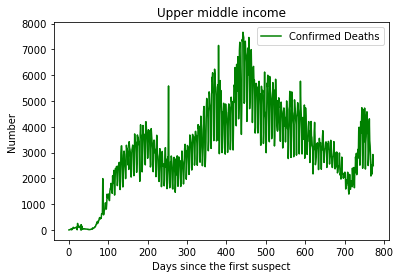

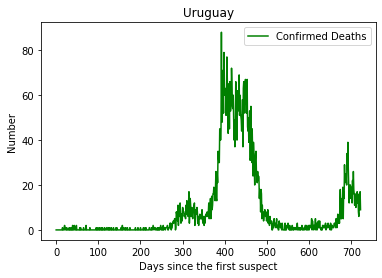

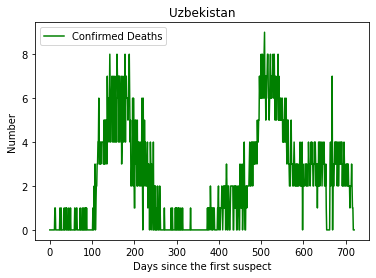

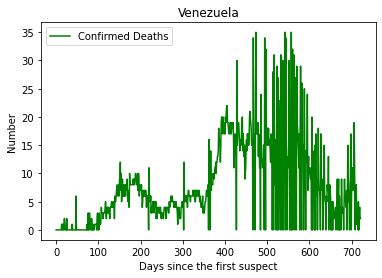

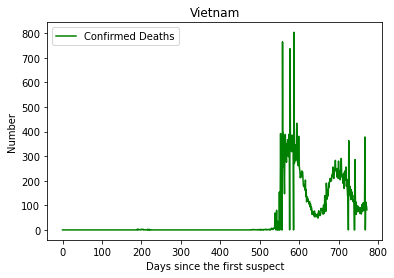

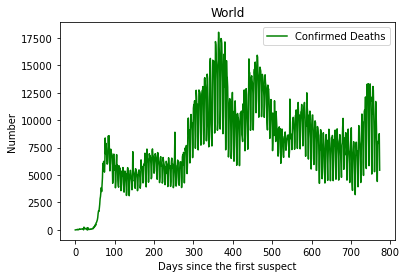

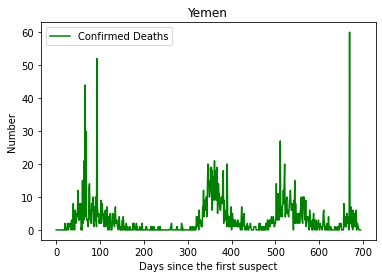

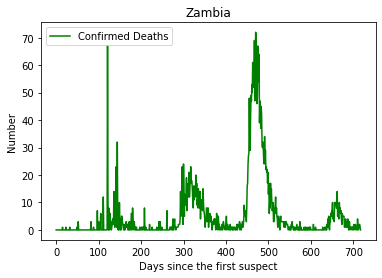

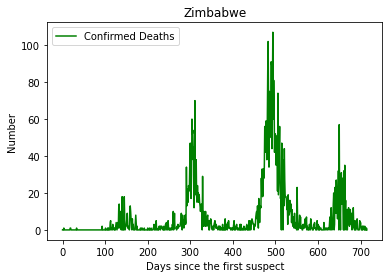

In [20]:
for idx in range(0,len(countries)):
    c = df2[df2['Country']==countries[idx]].reset_index()
    plt.plot(np.arange(0,len(c)),c['New Deaths'],color='green',label='Confirmed Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number')
    plt.legend()
    plt.show()

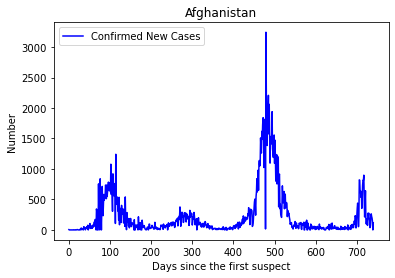

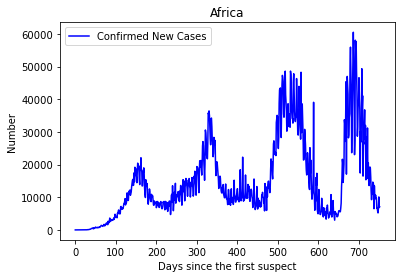

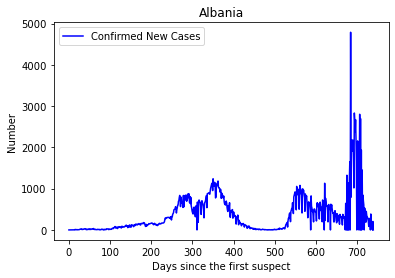

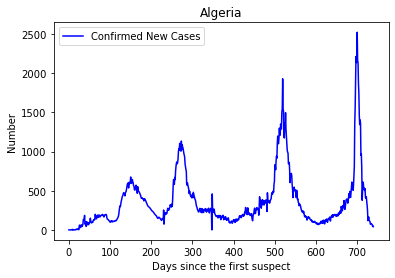

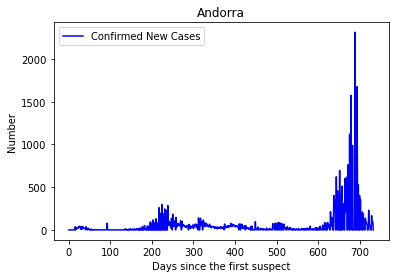

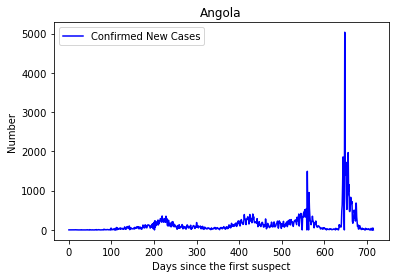

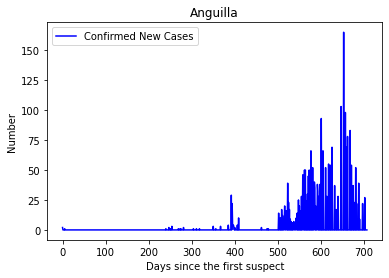

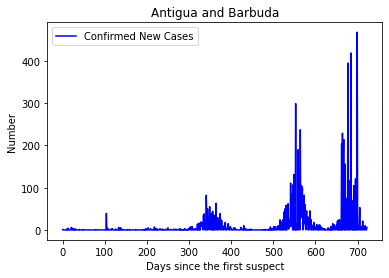

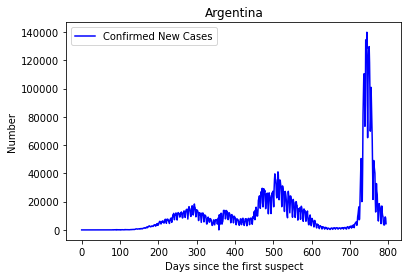

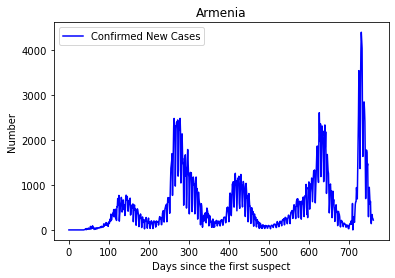

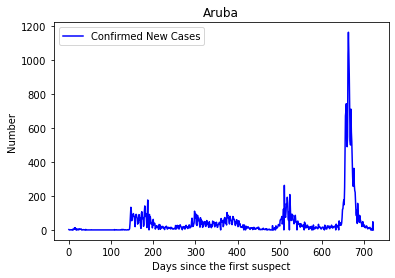

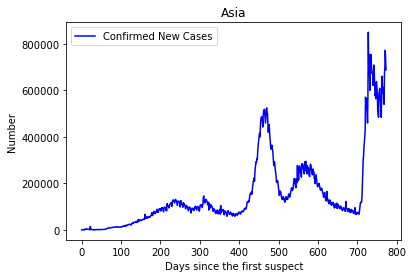

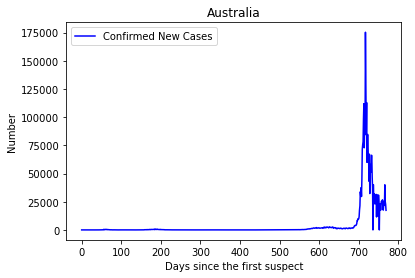

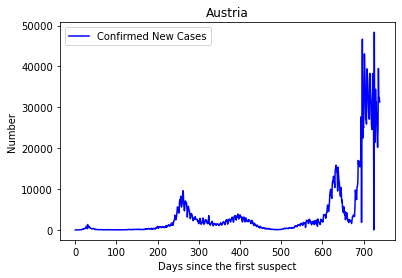

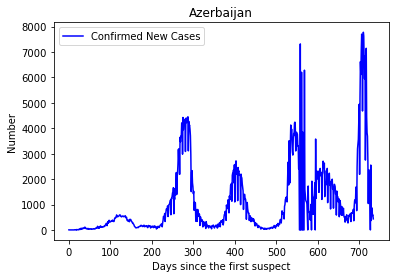

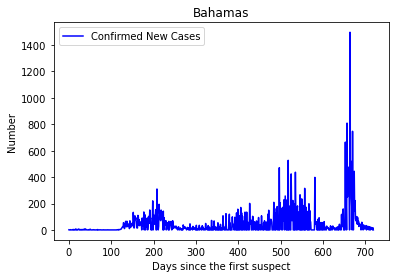

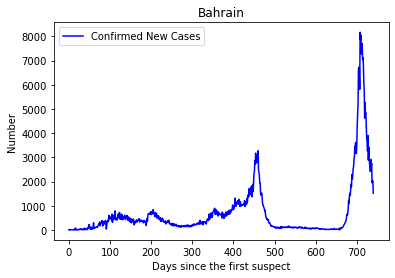

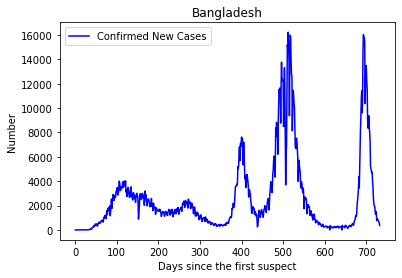

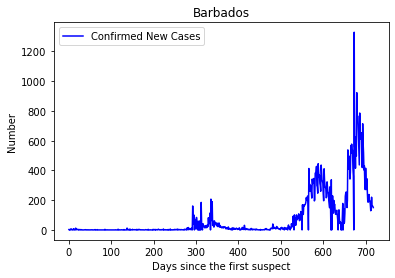

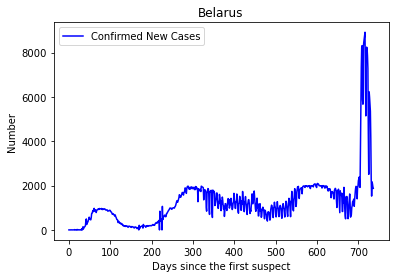

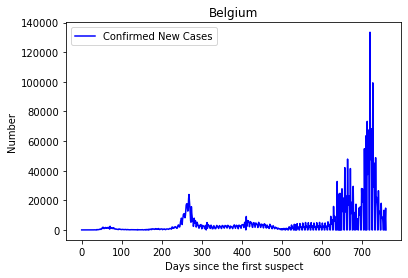

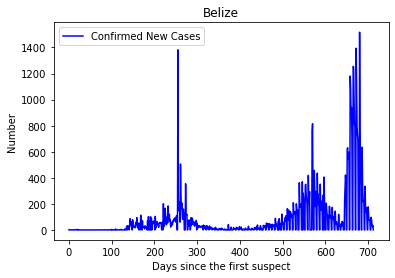

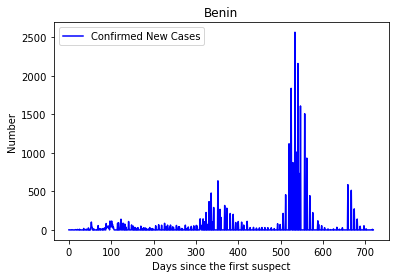

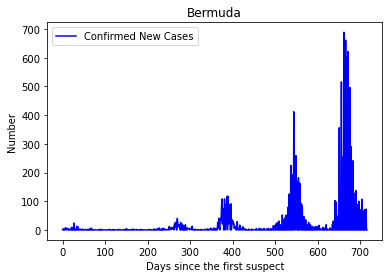

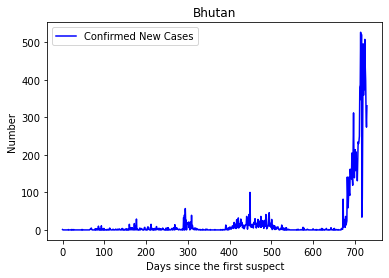

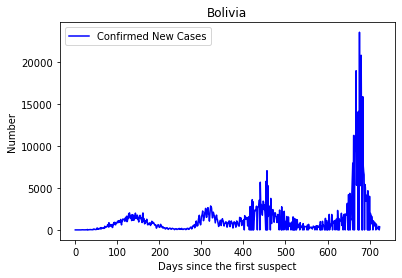

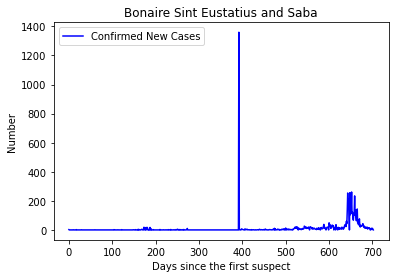

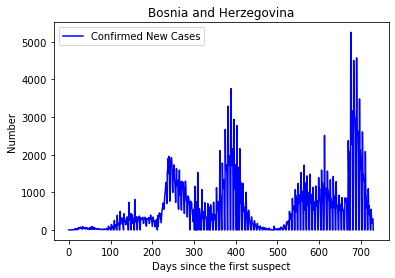

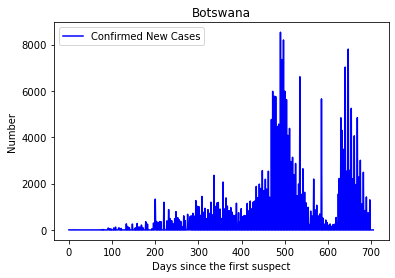

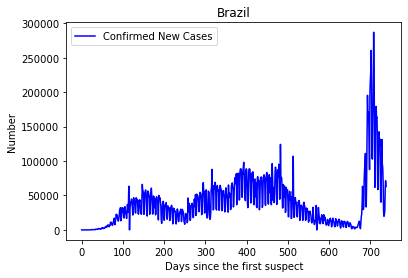

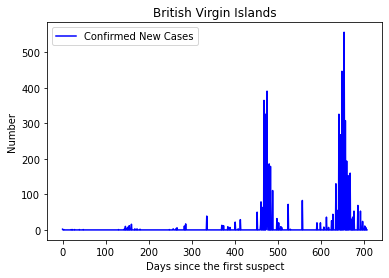

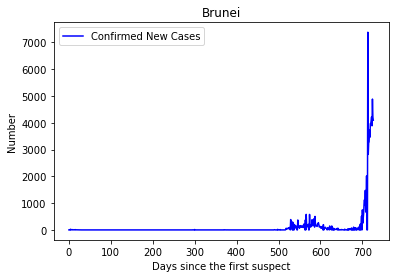

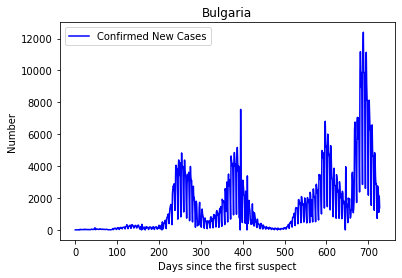

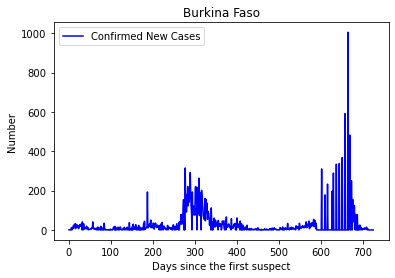

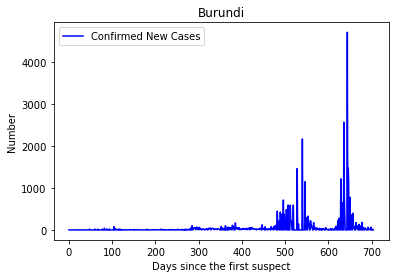

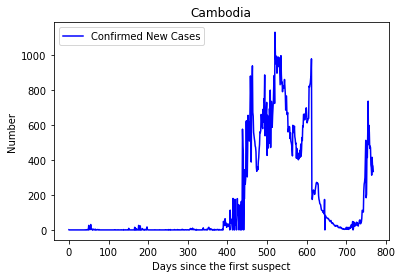

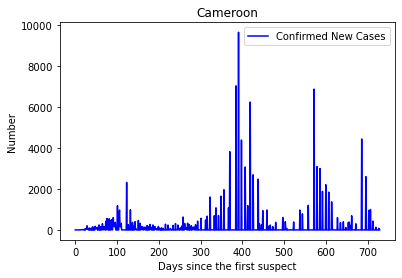

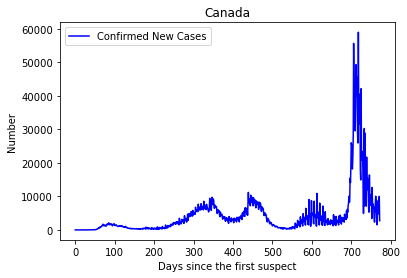

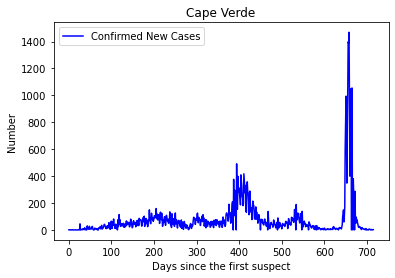

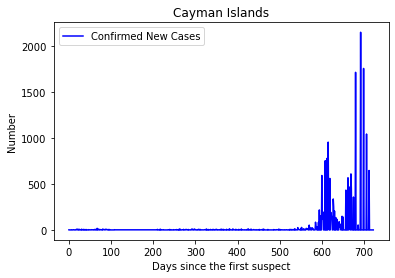

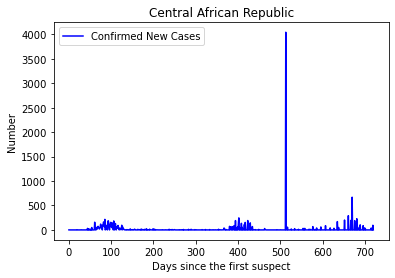

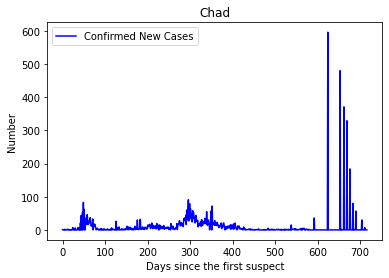

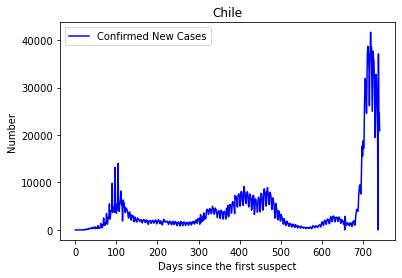

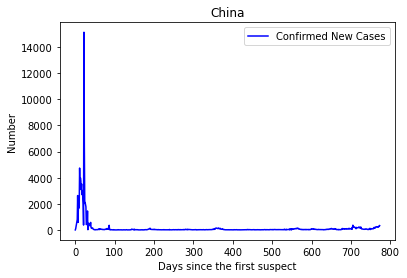

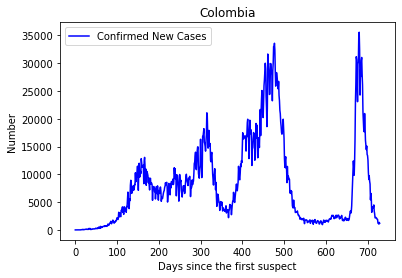

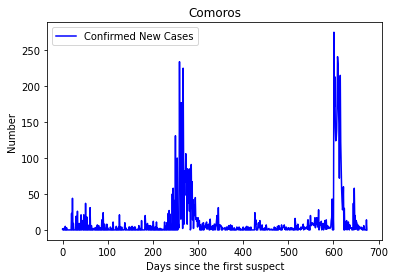

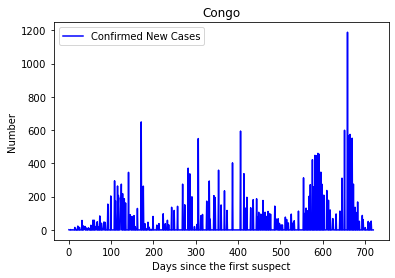

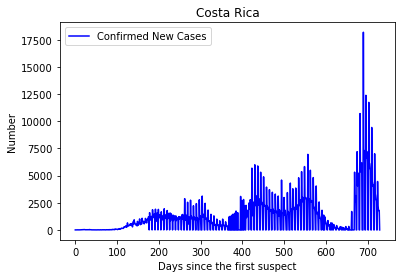

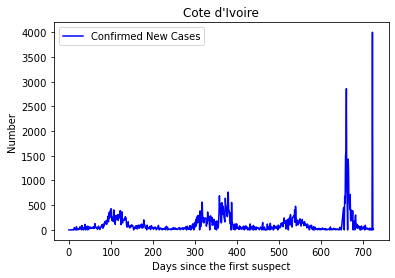

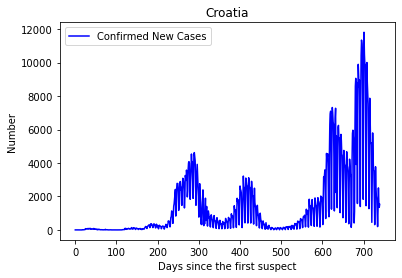

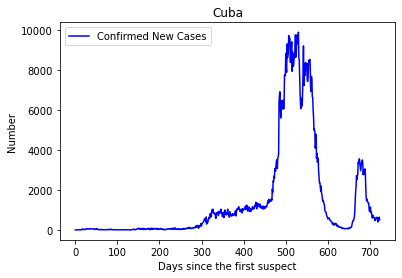

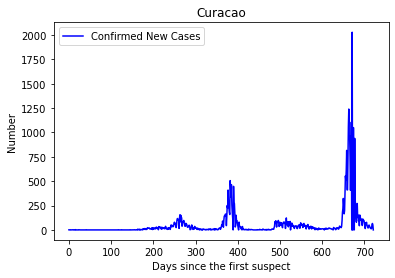

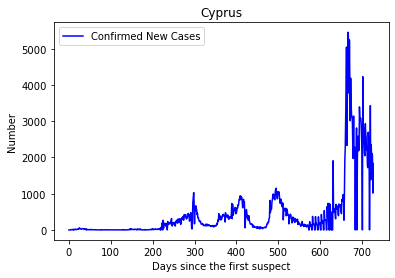

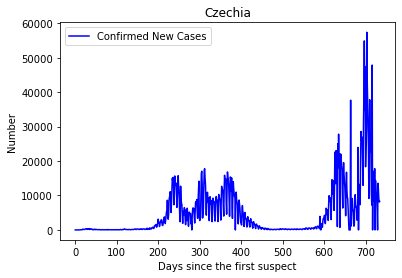

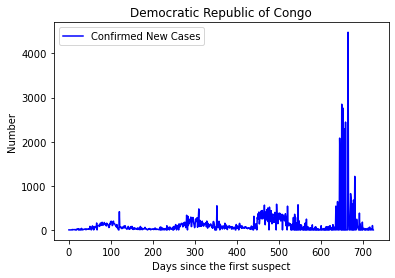

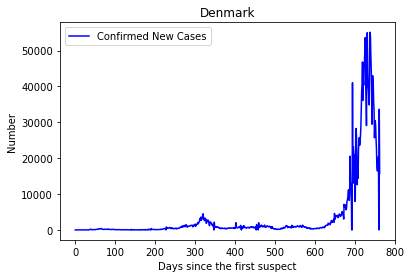

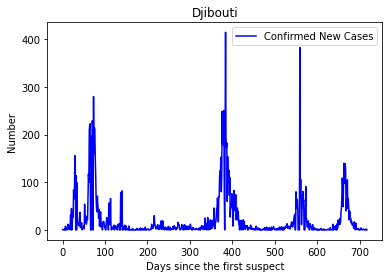

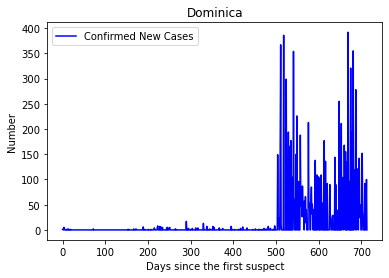

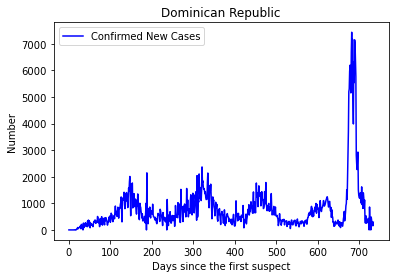

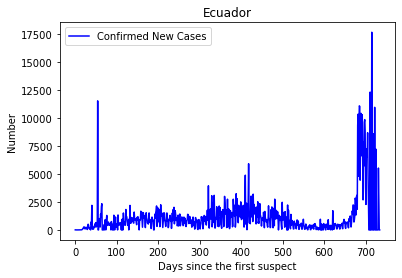

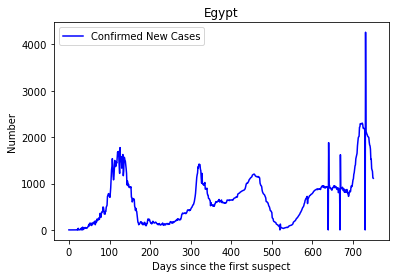

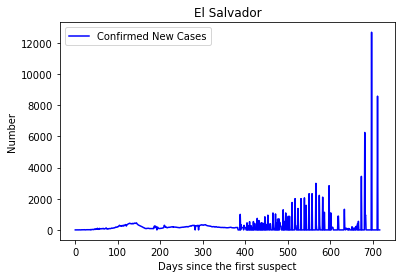

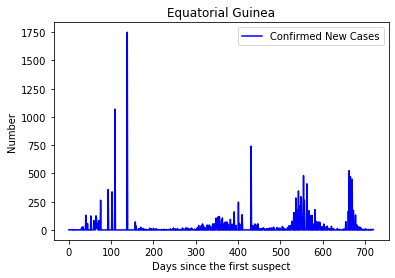

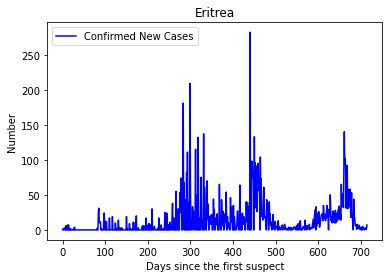

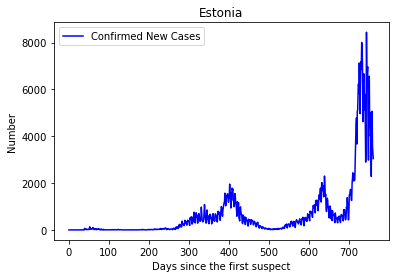

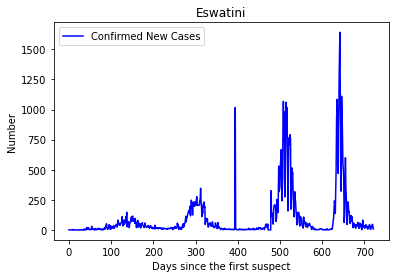

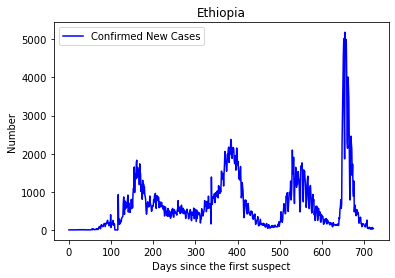

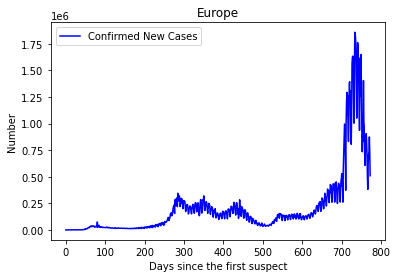

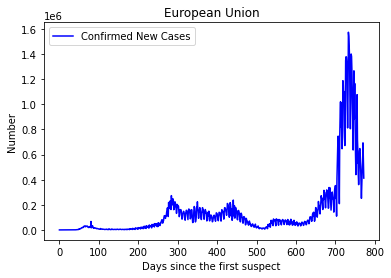

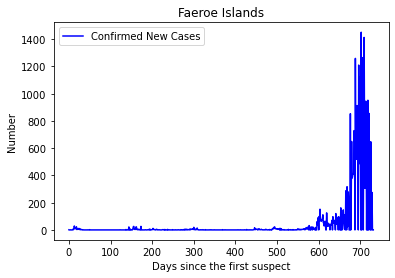

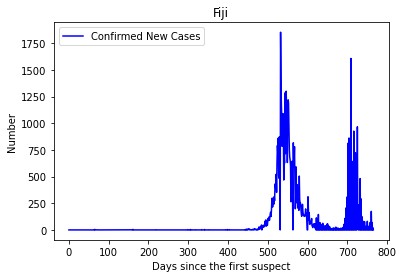

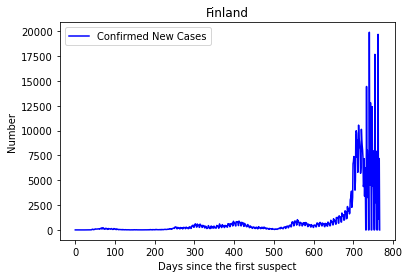

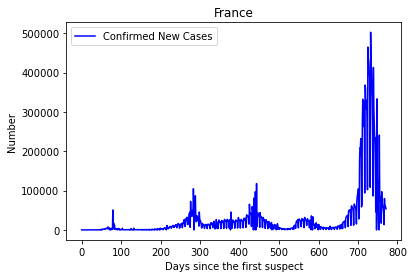

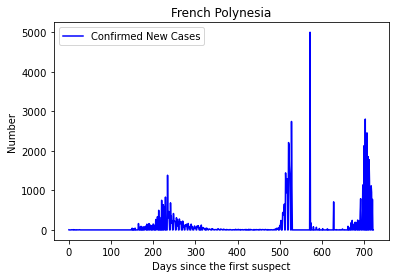

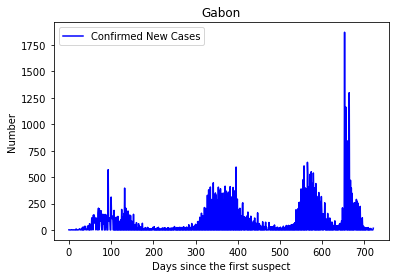

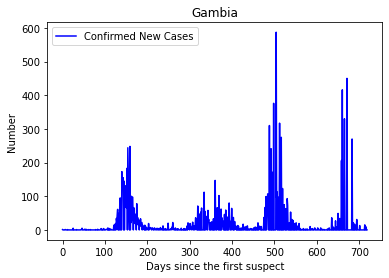

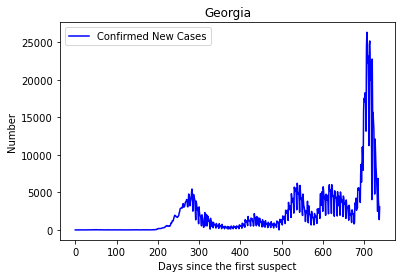

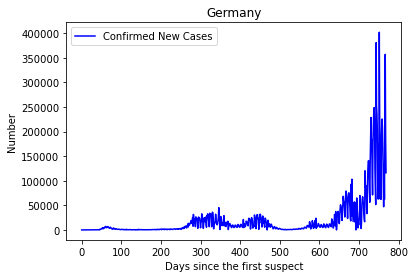

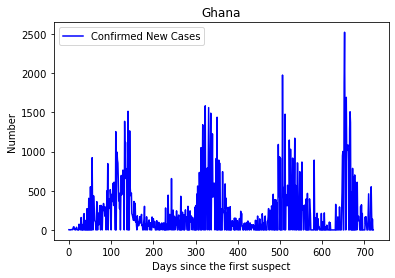

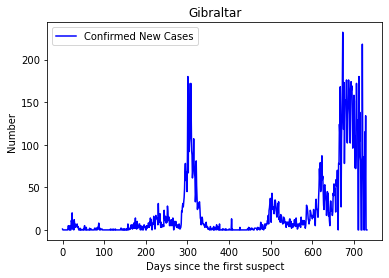

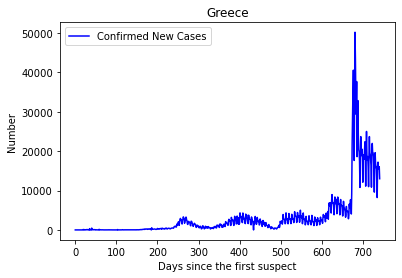

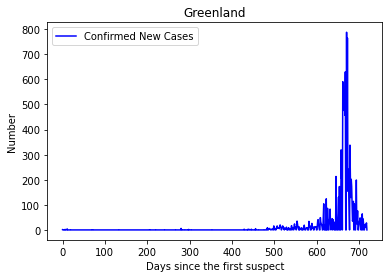

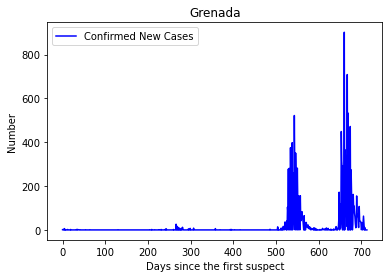

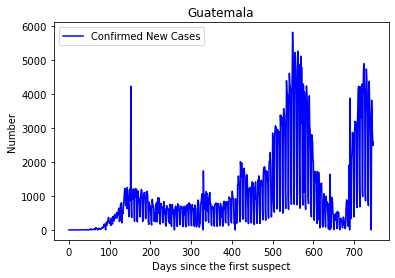

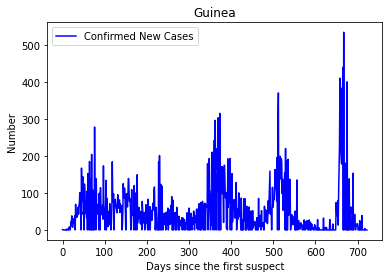

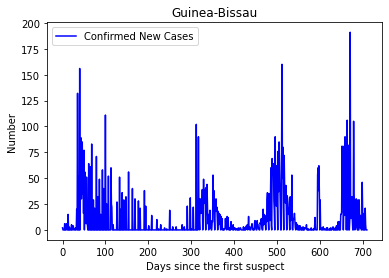

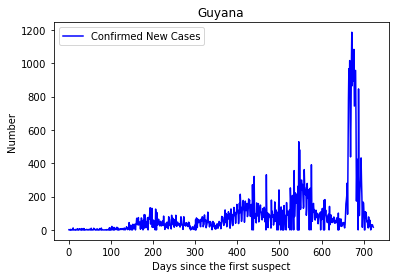

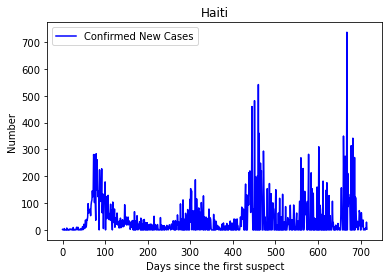

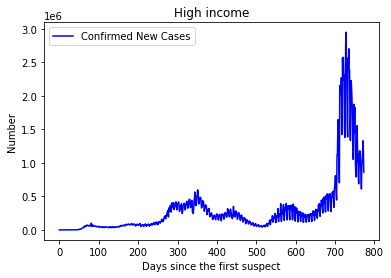

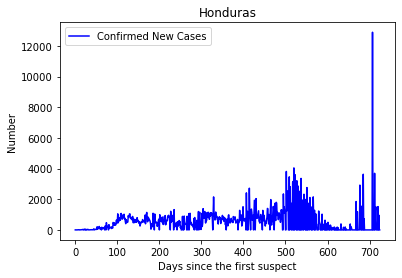

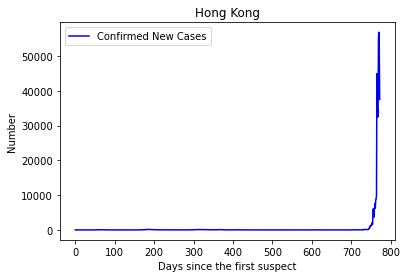

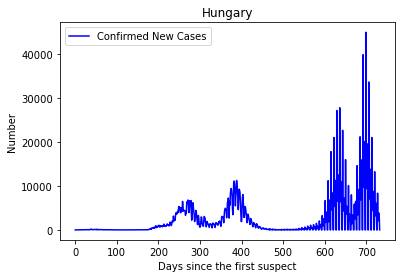

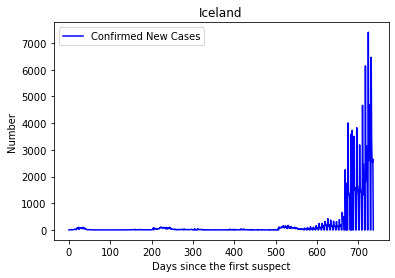

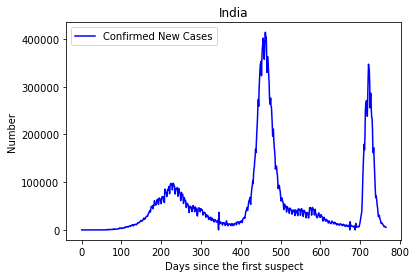

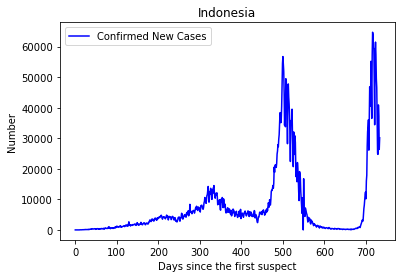

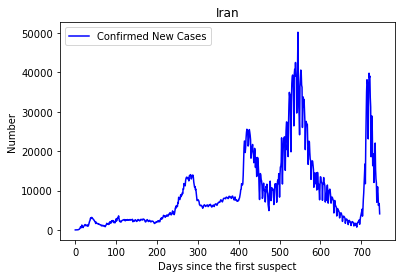

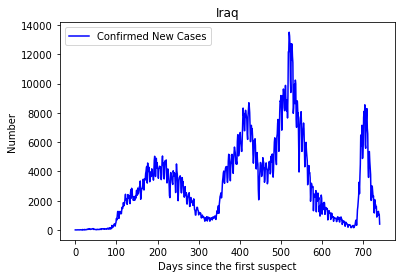

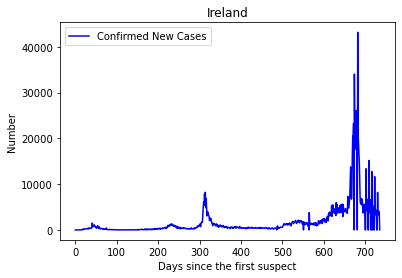

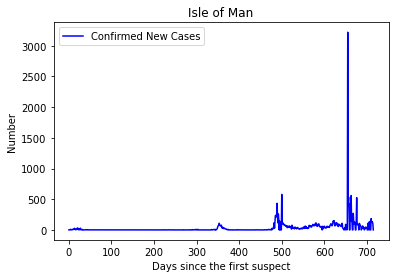

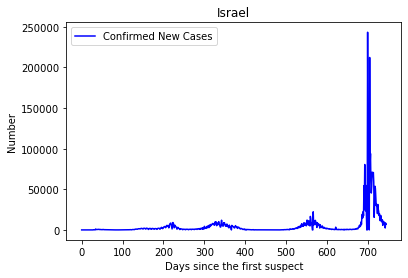

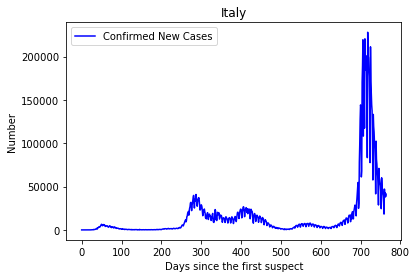

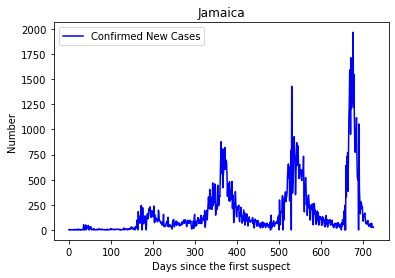

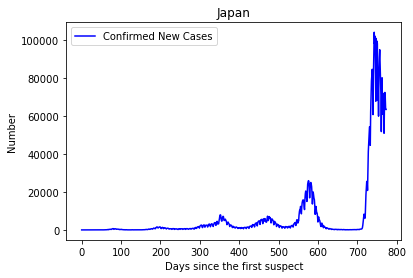

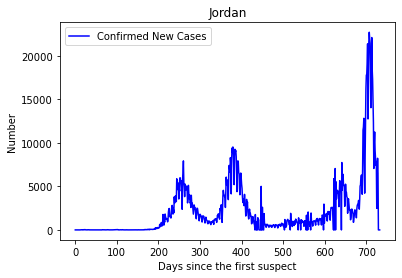

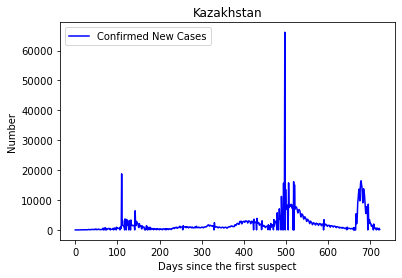

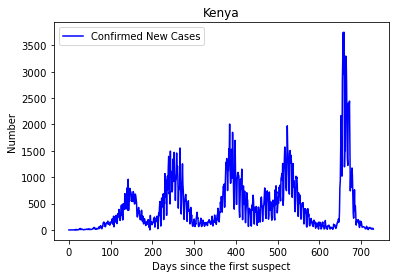

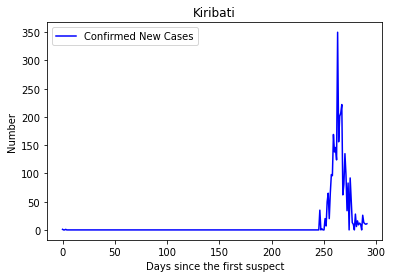

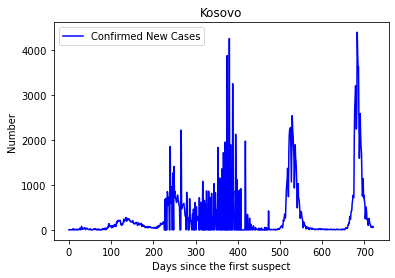

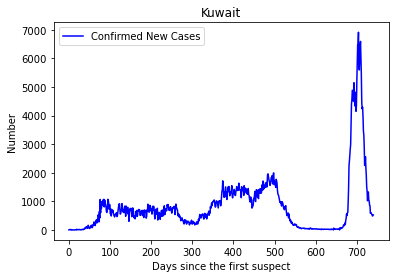

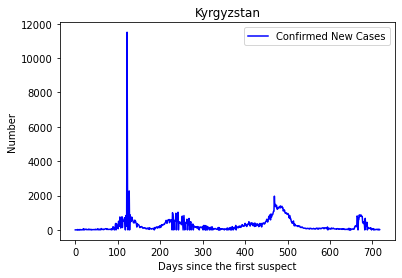

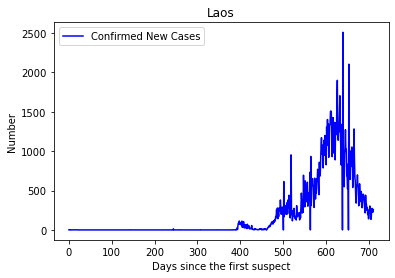

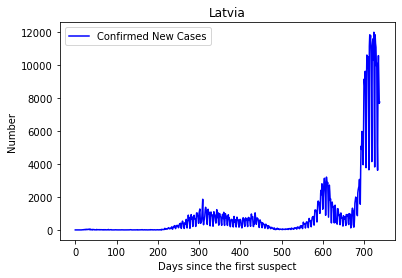

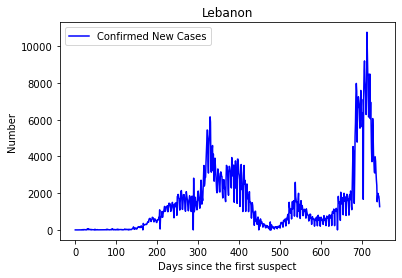

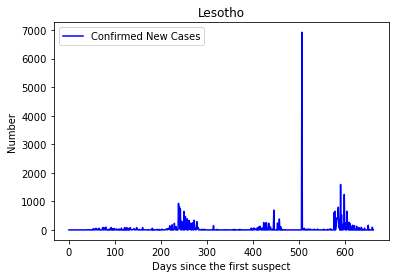

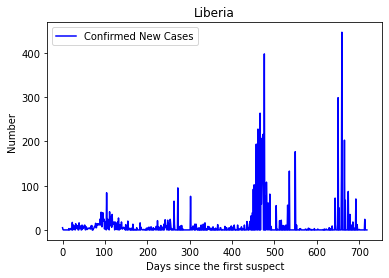

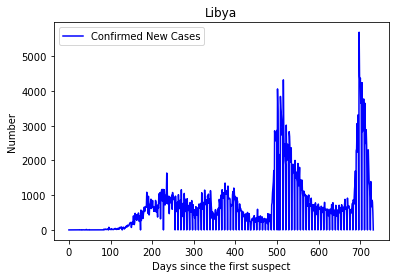

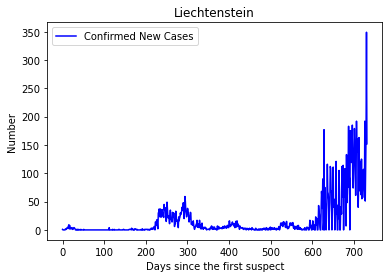

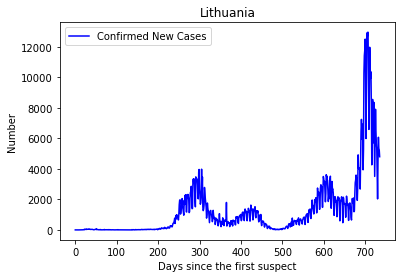

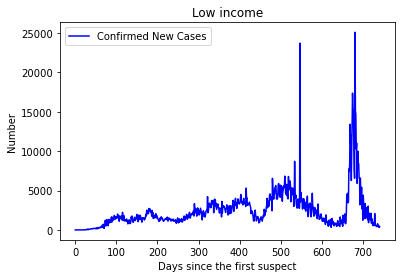

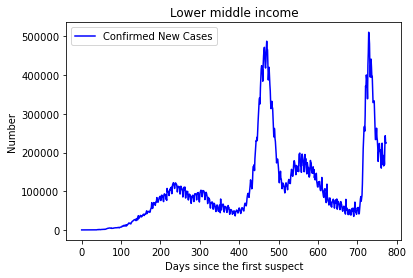

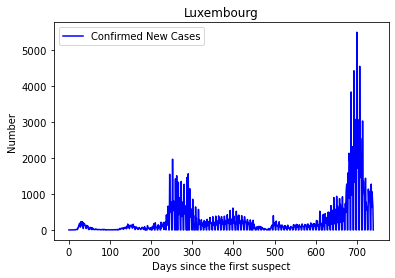

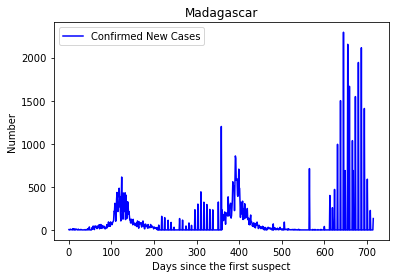

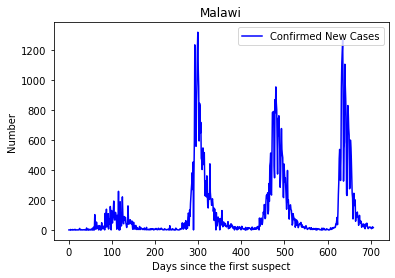

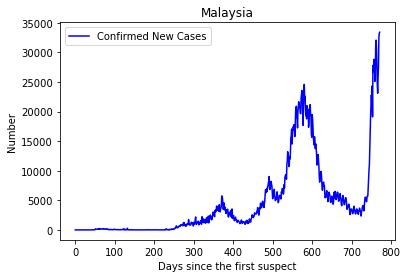

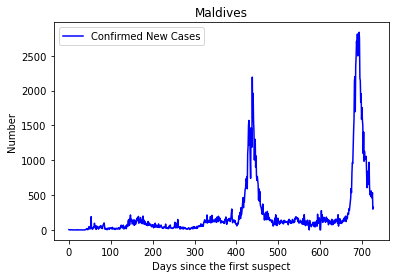

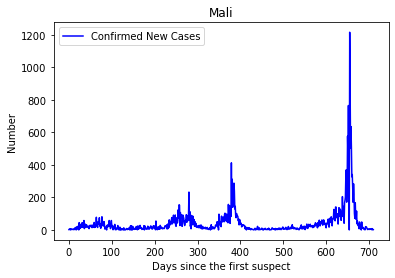

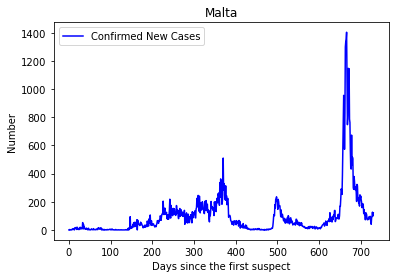

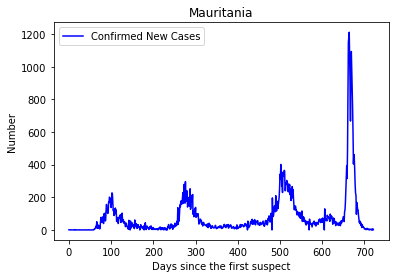

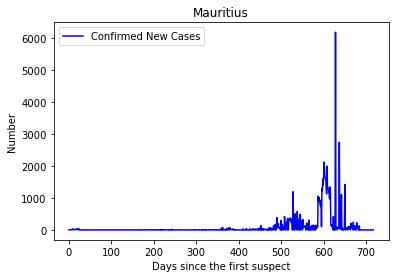

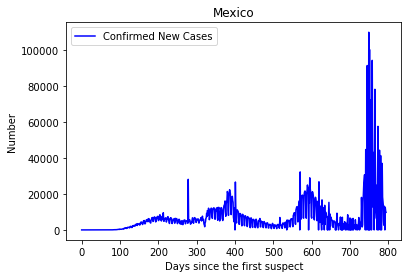

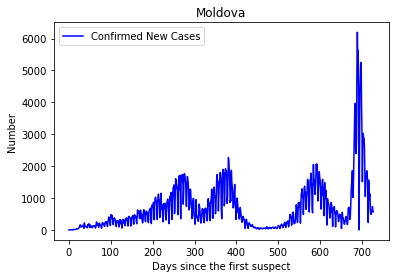

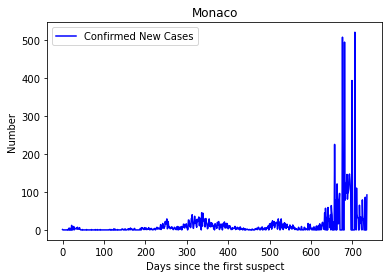

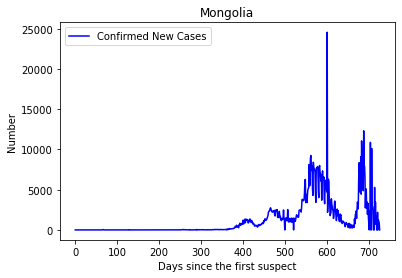

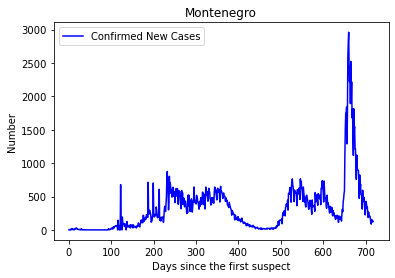

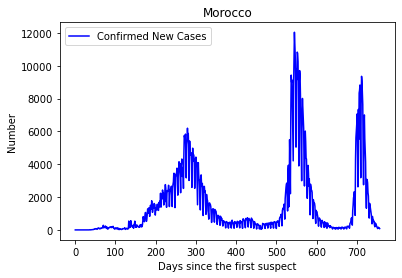

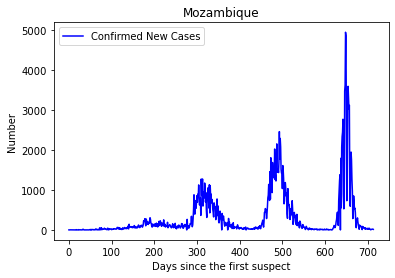

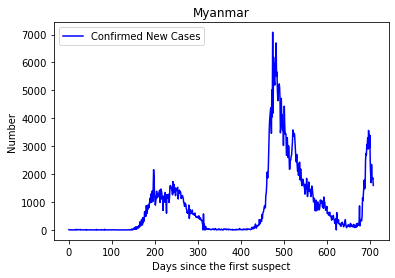

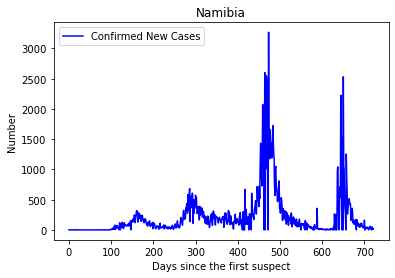

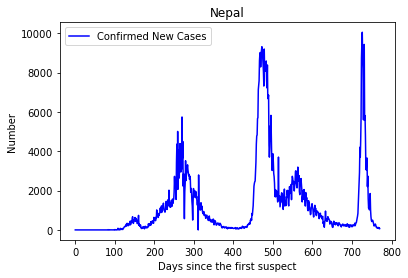

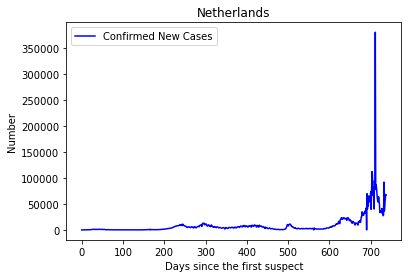

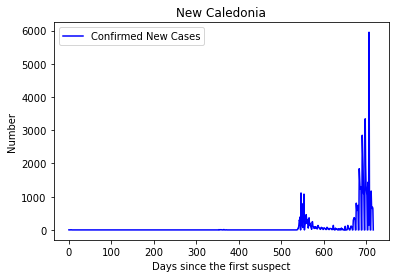

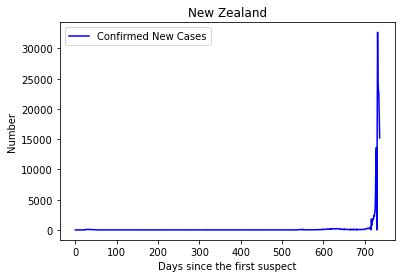

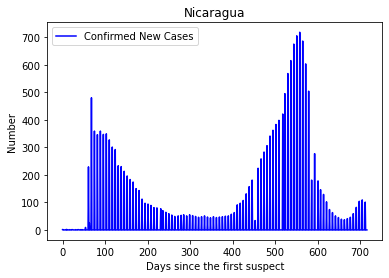

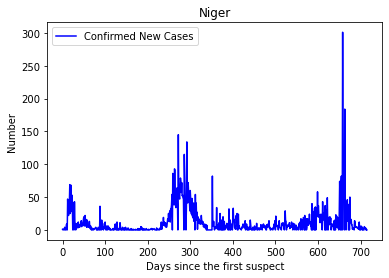

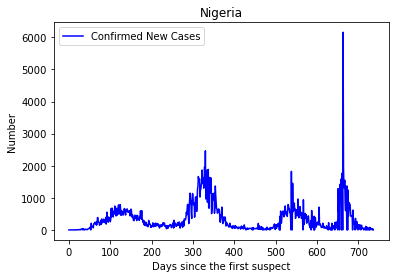

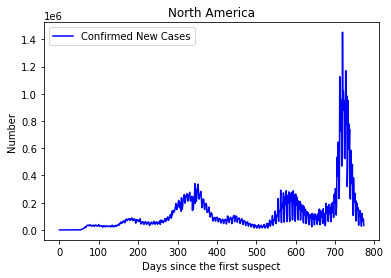

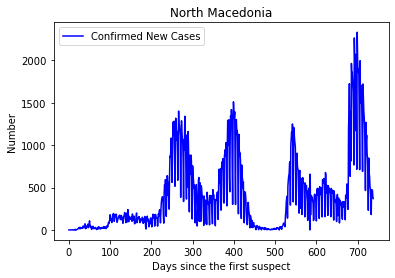

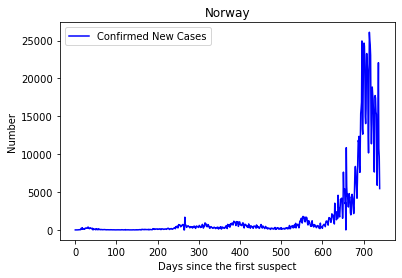

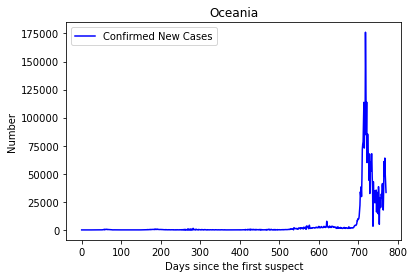

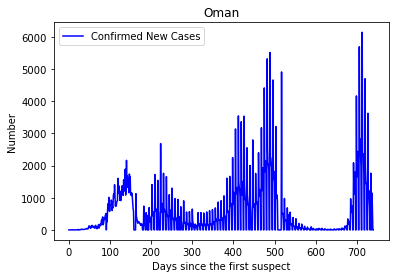

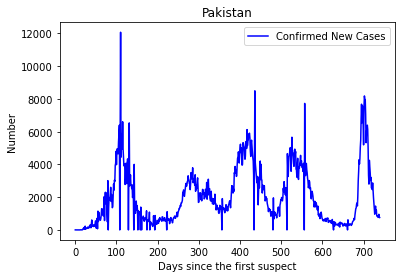

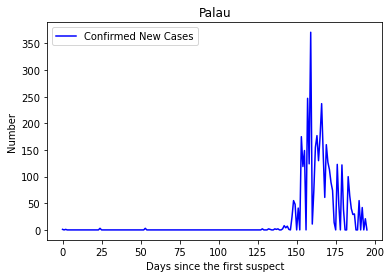

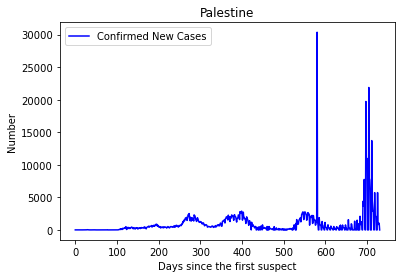

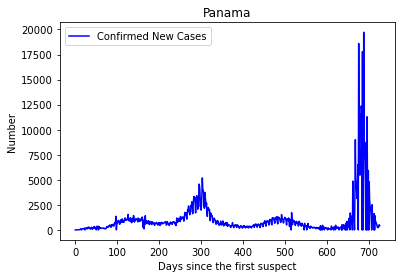

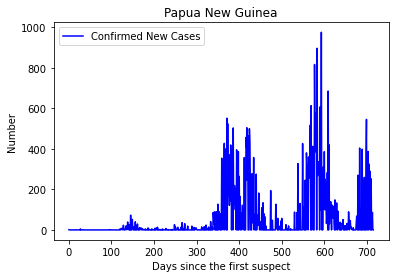

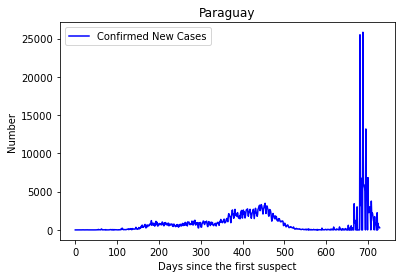

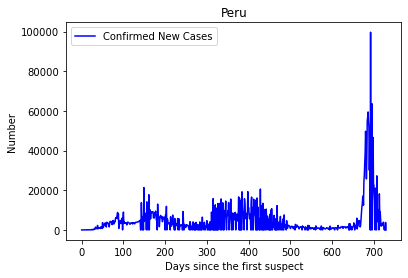

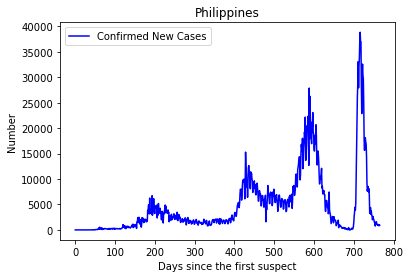

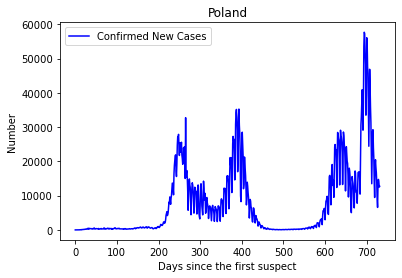

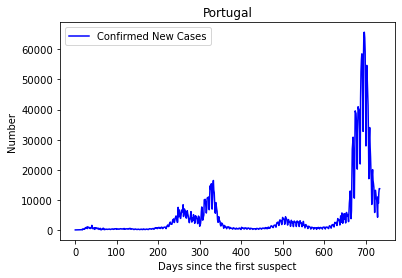

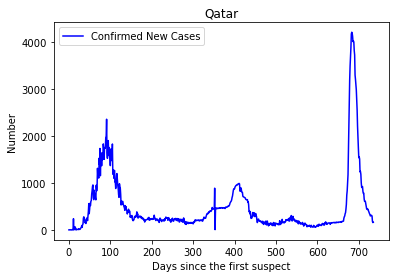

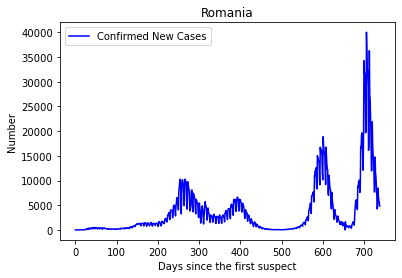

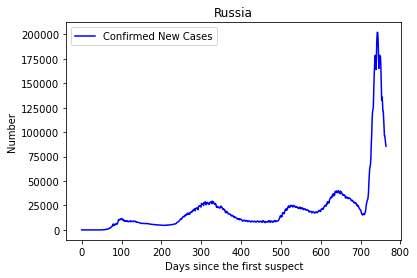

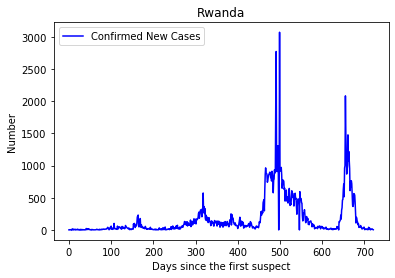

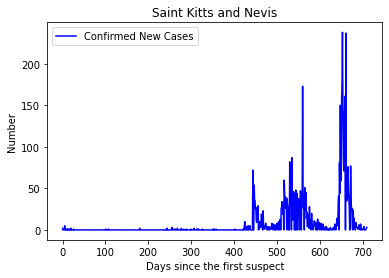

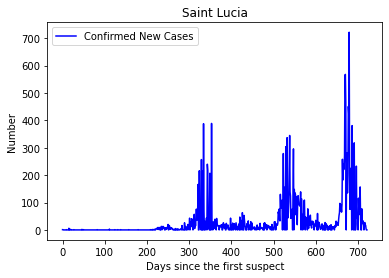

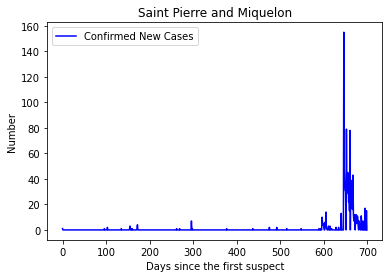

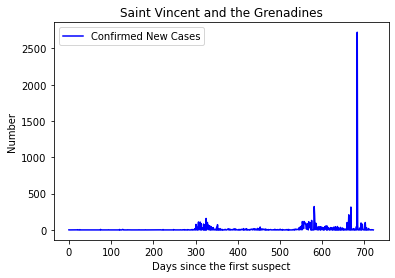

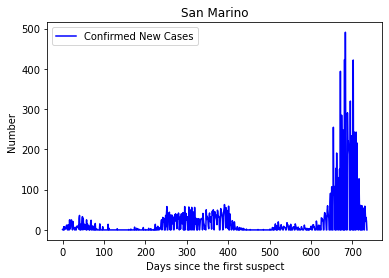

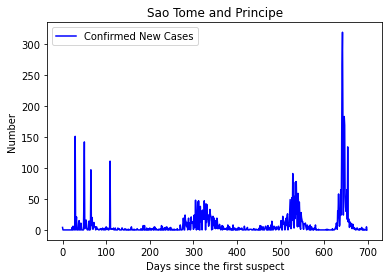

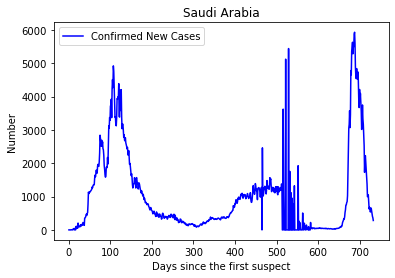

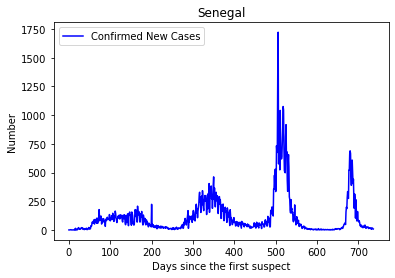

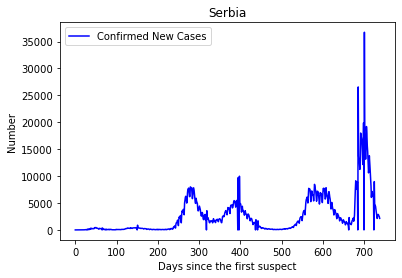

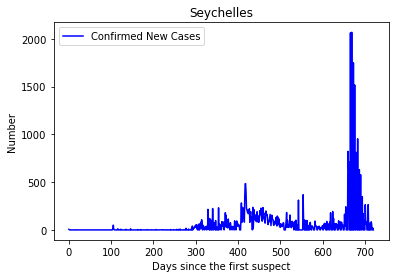

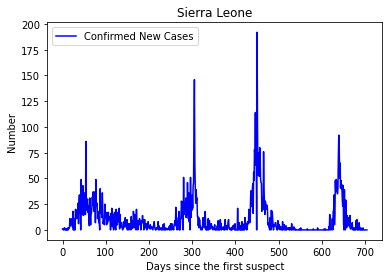

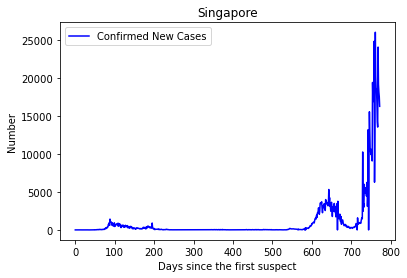

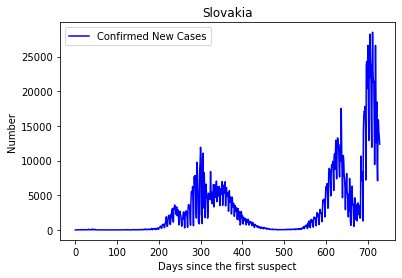

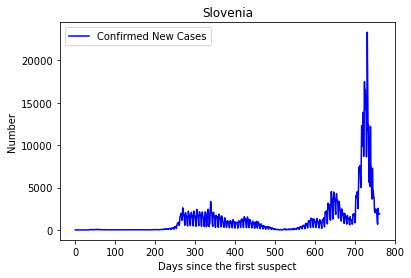

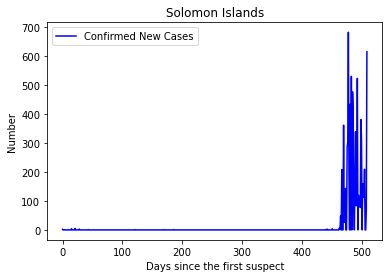

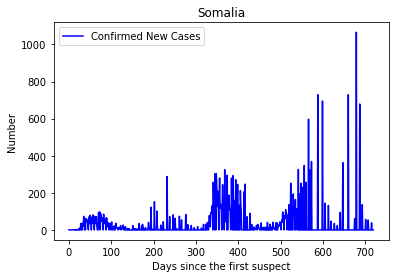

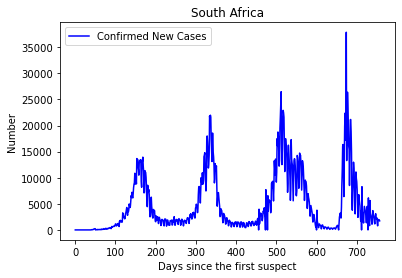

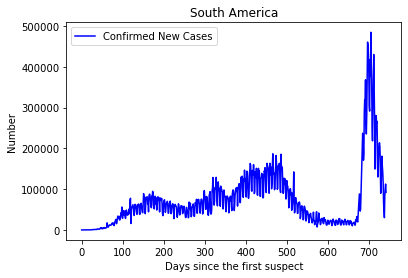

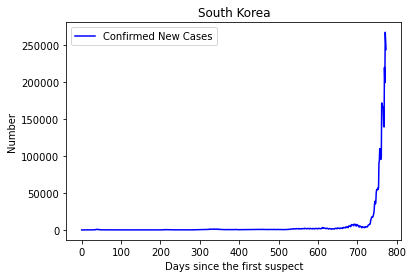

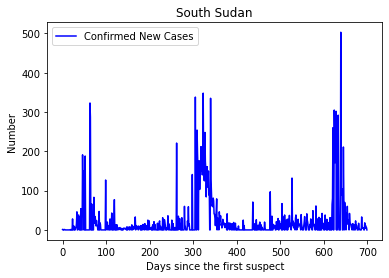

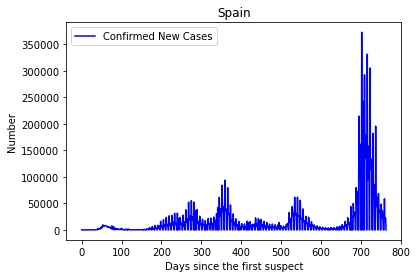

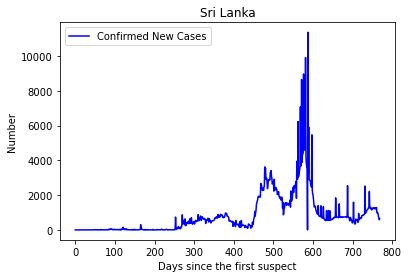

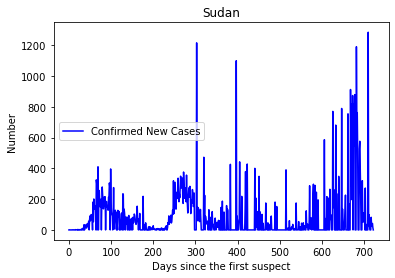

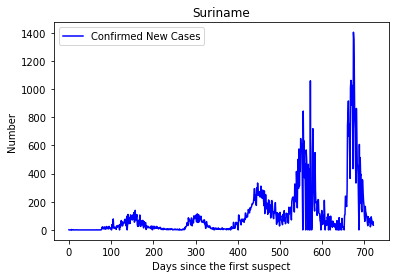

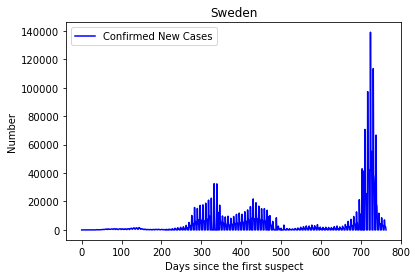

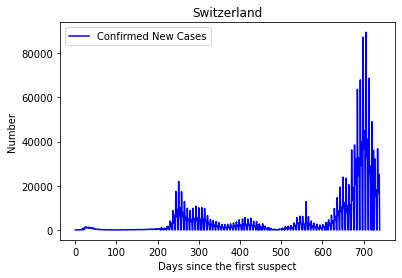

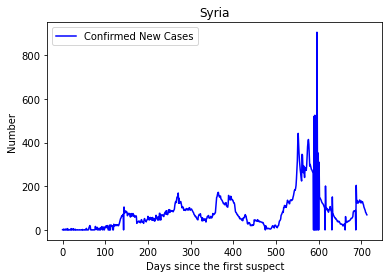

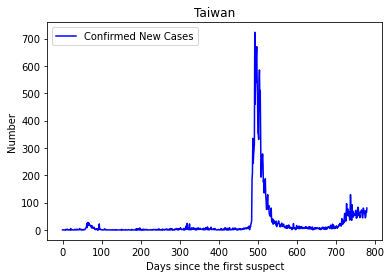

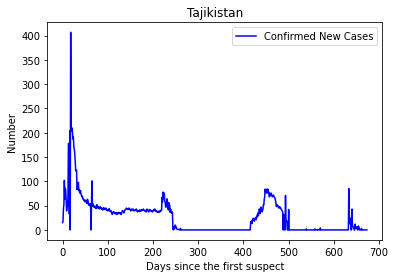

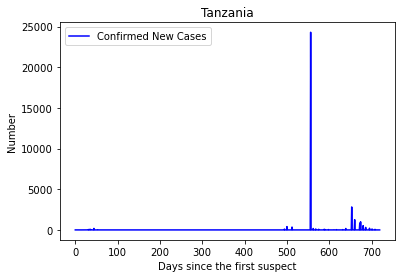

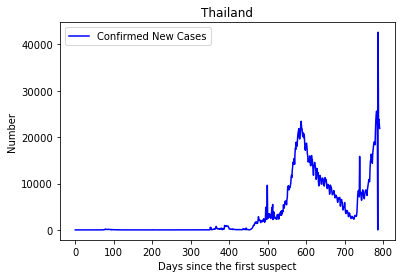

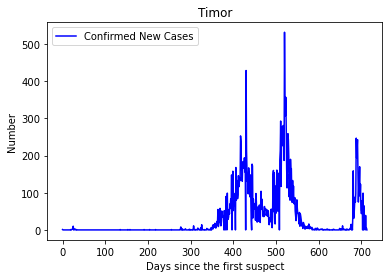

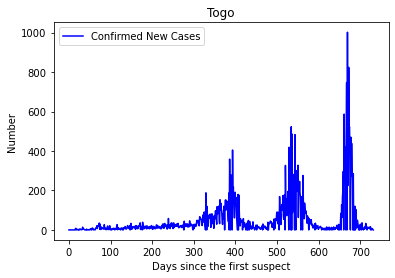

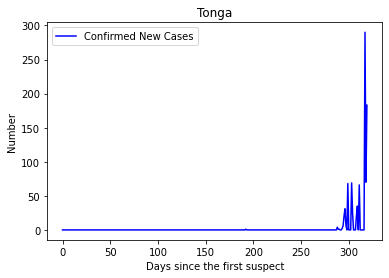

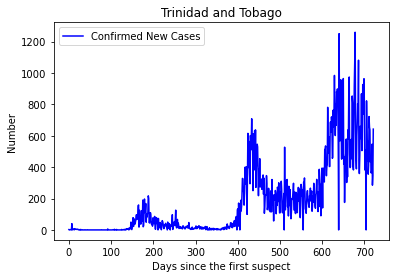

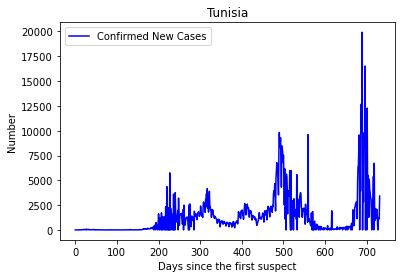

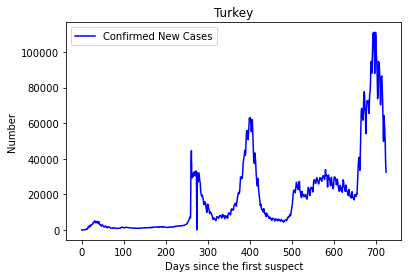

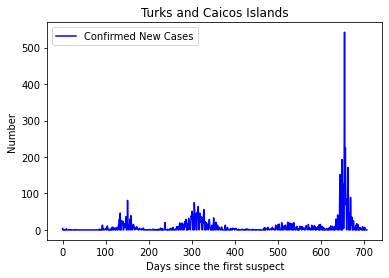

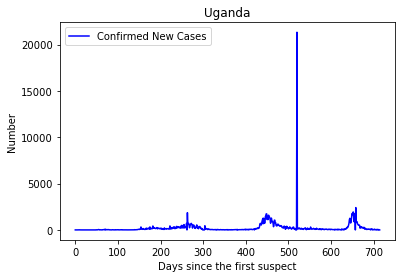

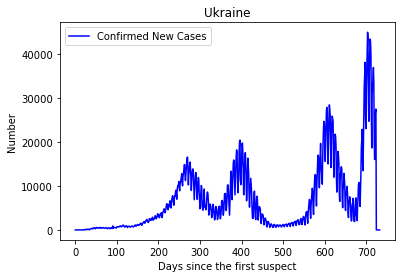

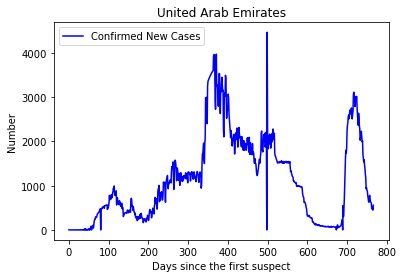

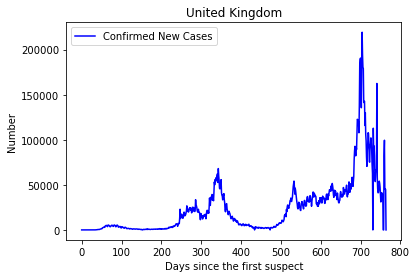

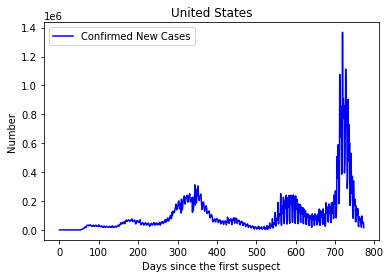

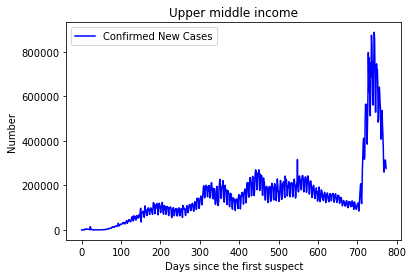

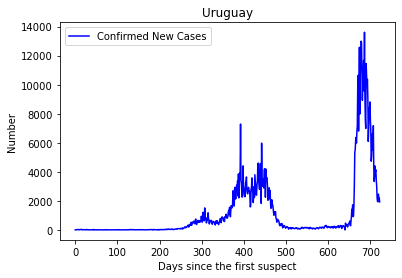

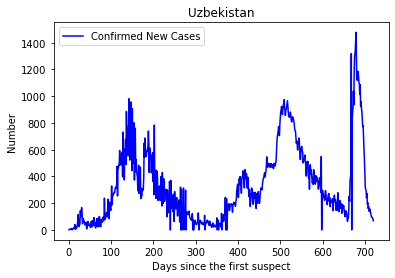

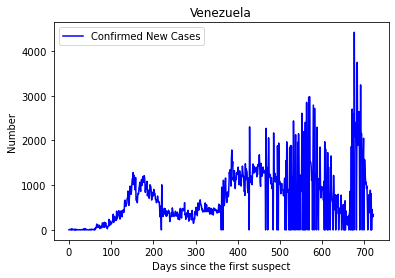

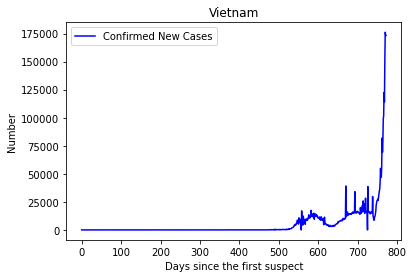

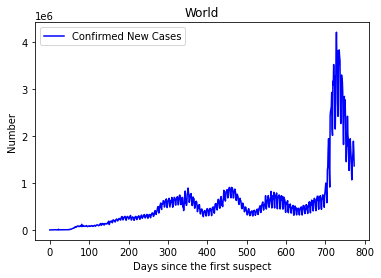

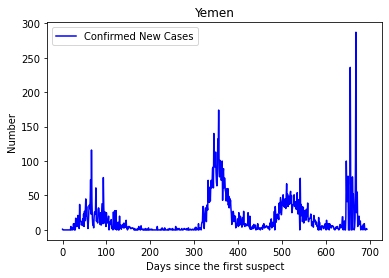

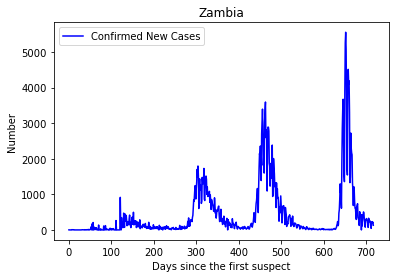

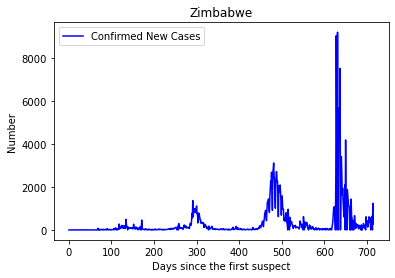

In [21]:
for idx in range(0,len(countries)):
    c = df2[df2['Country']==countries[idx]].reset_index()
    plt.plot(np.arange(0,len(c)),c['New Cases'],color='blue',label='Confirmed New Cases')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number')
    plt.legend()
    plt.show()